# Airline Passenger Satisfaction - Preprocessing

### Cel projektu
Głównym celem projektu jest zaprojektowanie klasyfikatora umożliwiającego ocenę zadowolenia pasarzerów linii lotniczych.
Dane

### Do treningu oraz optymalizacji modelu wykorzystane zostaną dane ze zbioru Airline Passenger Satisfaction.
Zbiór zawiera informacje zwrotne z ankiet wypełnianych przez klientów korzystających US Airline. Jedną z cech jest ocena ogólna, która przyjmuje dwie możliwe wartości: "satisfied" lub "neutral/dissatisfied", które to będą stanowić klasy wyjściowe modelu.

### Kolejne kroki realizacji
1. Analiza oraz preprocessing danych.
2. Określenie istotności poszczególnych cech danych oraz ich korelacji z klasami wyjściowymi.
3. Utworzenie modelu klasyfikatora.
4. Optymalizacja klasyfikatora.
5. Testy oraz podsumowanie wyników.


In [46]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [75]:
# loading data
train = pd.read_csv('finalDataset2/train.csv')
# df_train['type']="train"
test = pd.read_csv('finalDataset2/test.csv')
# df_test['type']="test"

In [76]:
# combining train and test data
data = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [77]:
# presenting data
data.head()

id  Customer Type   Age  Type of Travel  Class  Flight Distance  \
0  19556.0            1.0  52.0             1.0    0.0            160.0   
1  90035.0            1.0  36.0             1.0    2.0           2863.0   
2  12360.0            0.0  20.0             1.0    0.0            192.0   
3  77959.0            1.0  44.0             1.0    2.0           3377.0   
4  36875.0            1.0  49.0             1.0    0.0           1182.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                    5.0                                4.0   
1                    1.0                                1.0   
2                    2.0                                0.0   
3                    0.0                                0.0   
4                    2.0                                3.0   

   Ease of Online booking  Gate location  ...  Baggage handling  \
0                     3.0            4.0  ...               5.0   
1                     3.0            1.0  ...               4.0   
2                     2.0            4.0  ...               3.0   
3                     0.0            2.0  ...               1.0   
4                     4.0            3.0  ...               2.0   

   Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  \
0              2.0               5.0          5.0                        50.0   
1              3.0               4.0          5.0                         0.0   
2              2.0               2.0          2.0                         0.0   
3              3.0               1.0          4.0                         0.0   
4              4.0               2.0          4.0                         0.0   

   Arrival Delay in Minutes  satisfaction  Male  Female   ind  
0                      44.0           1.0   0.0     1.0  test  
1                       0.0           1.0   0.0     1.0  test  
2                       0.0           0.0   1.0     0.0  test  
3                       6.0           1.0   1.0     0.0  test  
4                      20.0           1.0   0.0     1.0  test  

[5 rows x 26 columns]

## Filling missing data

In [78]:
# data staticstics
data.describe()

id  Customer Type            Age  Type of Travel  \
count  129360.000000  129360.000000  129360.000000   129360.000000   
mean    64936.445501       0.816860      39.430728        0.690716   
std     37492.945434       0.386783      15.122226        0.462200   
min         1.000000       0.000000       7.000000        0.000000   
25%     32461.750000       1.000000      27.000000        0.000000   
50%     64936.500000       1.000000      40.000000        1.000000   
75%     97411.250000       1.000000      51.000000        1.000000   
max    129880.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  129360.000000     129360.00000          129360.000000   
mean        1.029692       1190.33464               2.729004   
std         0.962636        997.31967               1.329456   
min         0.000000         31.00000               0.000000   
25%         0.000000        414.00000               2.000000   
50%         1.000000        844.00000               3.000000   
75%         2.000000       1744.00000               4.000000   
max         2.000000       4983.00000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      129360.000000           129360.000000   
mean                            3.057638                2.756865   
std                             1.526884                1.401847   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  ...  Leg room service  Baggage handling  \
count  129360.000000  ...     129360.000000     129360.000000   
mean        2.976685  ...          3.350974          3.631903   
std         1.278507  ...          1.316270          1.180072   
min         0.000000  ...          0.000000          1.000000   
25%         2.000000  ...          2.000000          3.000000   
50%         3.000000  ...          4.000000          4.000000   
75%         4.000000  ...          4.000000          5.000000   
max         5.000000  ...          5.000000          5.000000   

       Checkin service  Inflight service    Cleanliness  \
count    129360.000000     129360.000000  129360.000000   
mean          3.306416          3.642084       3.286534   
std           1.266022          1.176618       1.313549   
min           0.000000          0.000000       0.000000   
25%           3.000000          3.000000       2.000000   
50%           3.000000          4.000000       3.000000   
75%           4.000000          5.000000       4.000000   
max           5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes   satisfaction  \
count               129360.000000             128970.000000  129360.000000   
mean                    14.715353                 15.090083       0.434392   
std                     38.101303                 38.471614       0.495679   
min                      0.000000                  0.000000       0.000000   
25%                      0.000000                  0.000000       0.000000   
50%                      0.000000                  0.000000       0.000000   
75%                     12.000000                 13.000000       1.000000   
max                   1592.000000               1584.000000       1.000000   

                Male         Female  
count  129360.000000  129360.000000  
mean        0.492525       0.507452  
std         0.499946       0.499946  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000  

[8 rows x 25 columns]

In [79]:
# train dataset number of missing data
data.isna().sum().head()

id                520
Customer Type     520
Age               520
Type of Travel    520
Class             520
dtype: int64

### Mean completion

In [80]:
# filling missing data with mean
data_mean = data.fillna(data.mean())
data_mean.isna().sum().head()

id                0
Customer Type     0
Age               0
Type of Travel    0
Class             0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesS

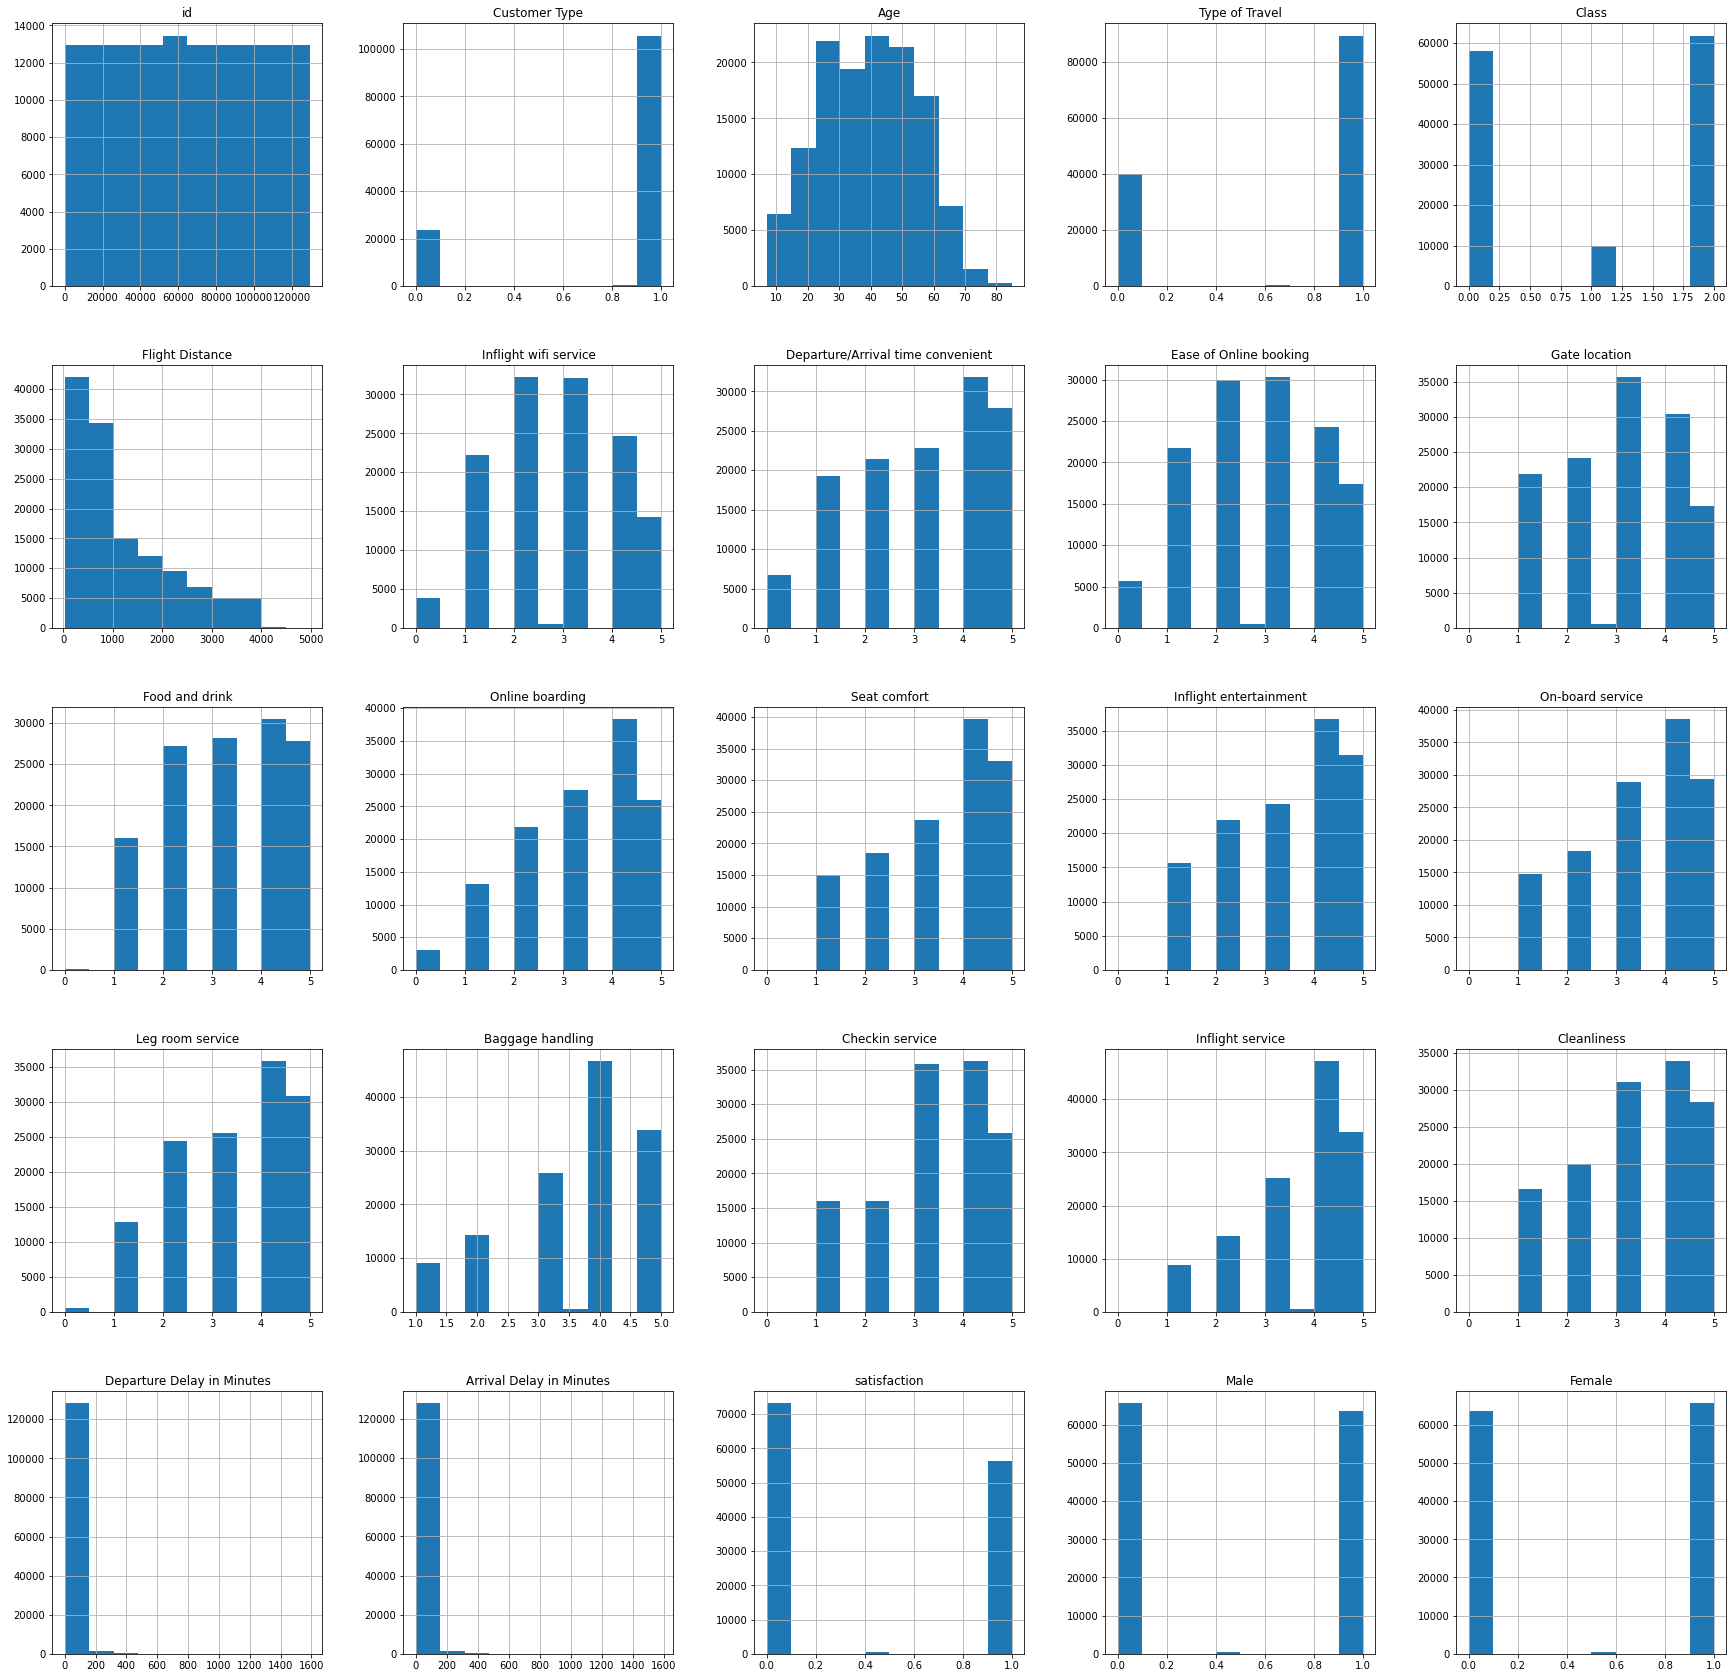

In [81]:
data_mean.hist(figsize=(30, 30))

### Median completion

In [82]:
# filling missing data with median
data_median = data.fillna(data.median())
data_median.isna().sum().head()

id                0
Customer Type     0
Age               0
Type of Travel    0
Class             0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesS

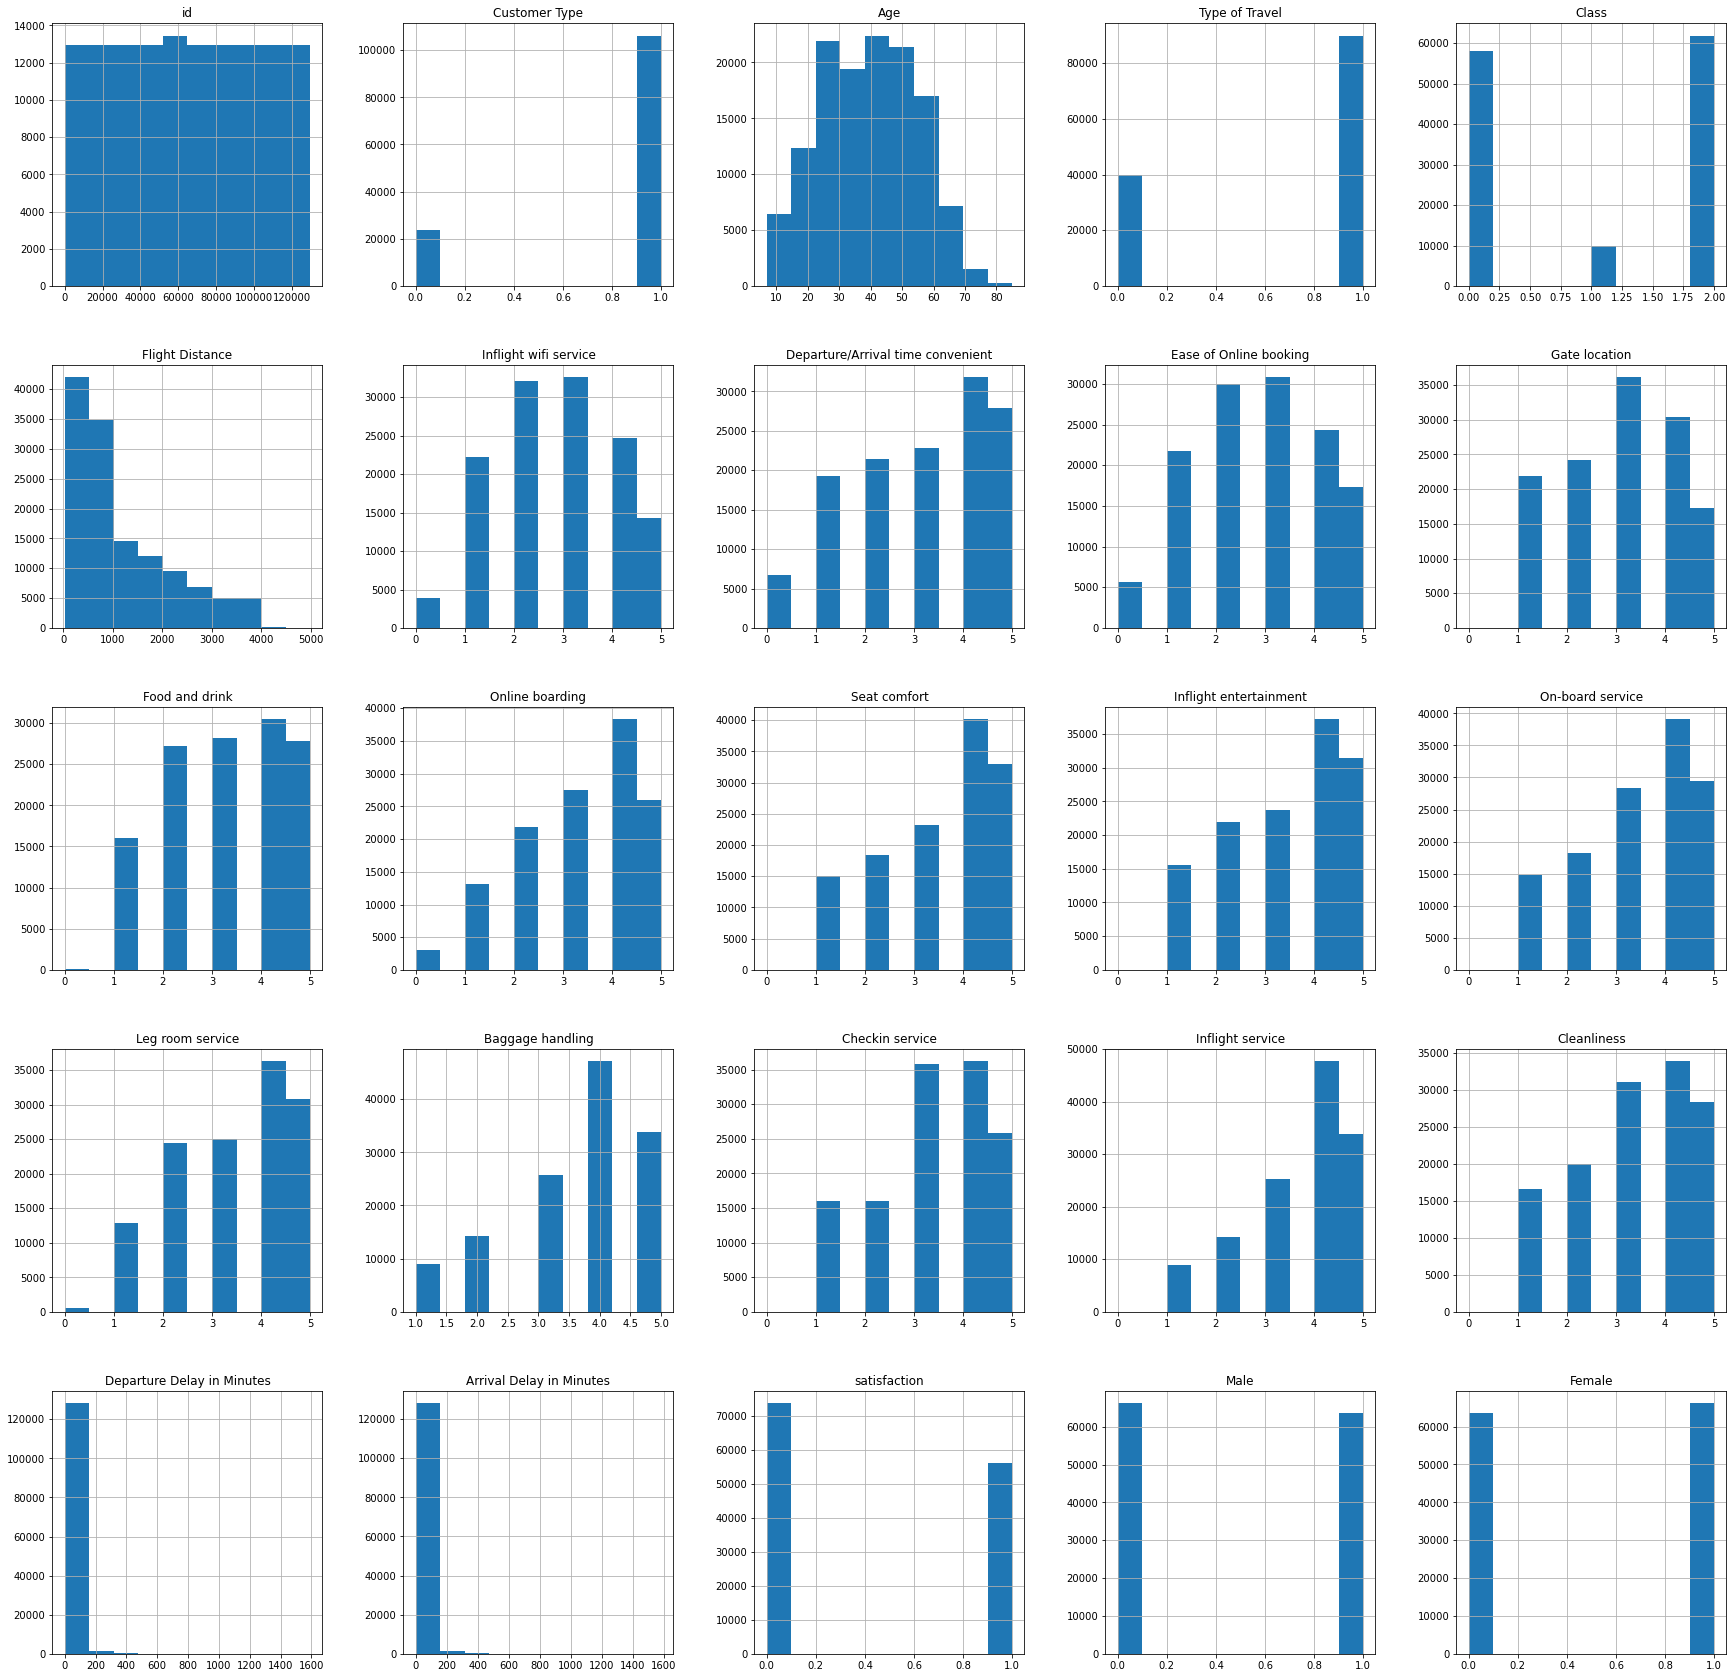

In [83]:
data_median.hist(figsize=(30, 30))

### Interpolation

In [84]:
# filling missing data by interpolation
data_interpolated = data.interpolate()
data_interpolated.isna().sum().head()

id                0
Customer Type     0
Age               0
Type of Travel    0
Class             0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesS

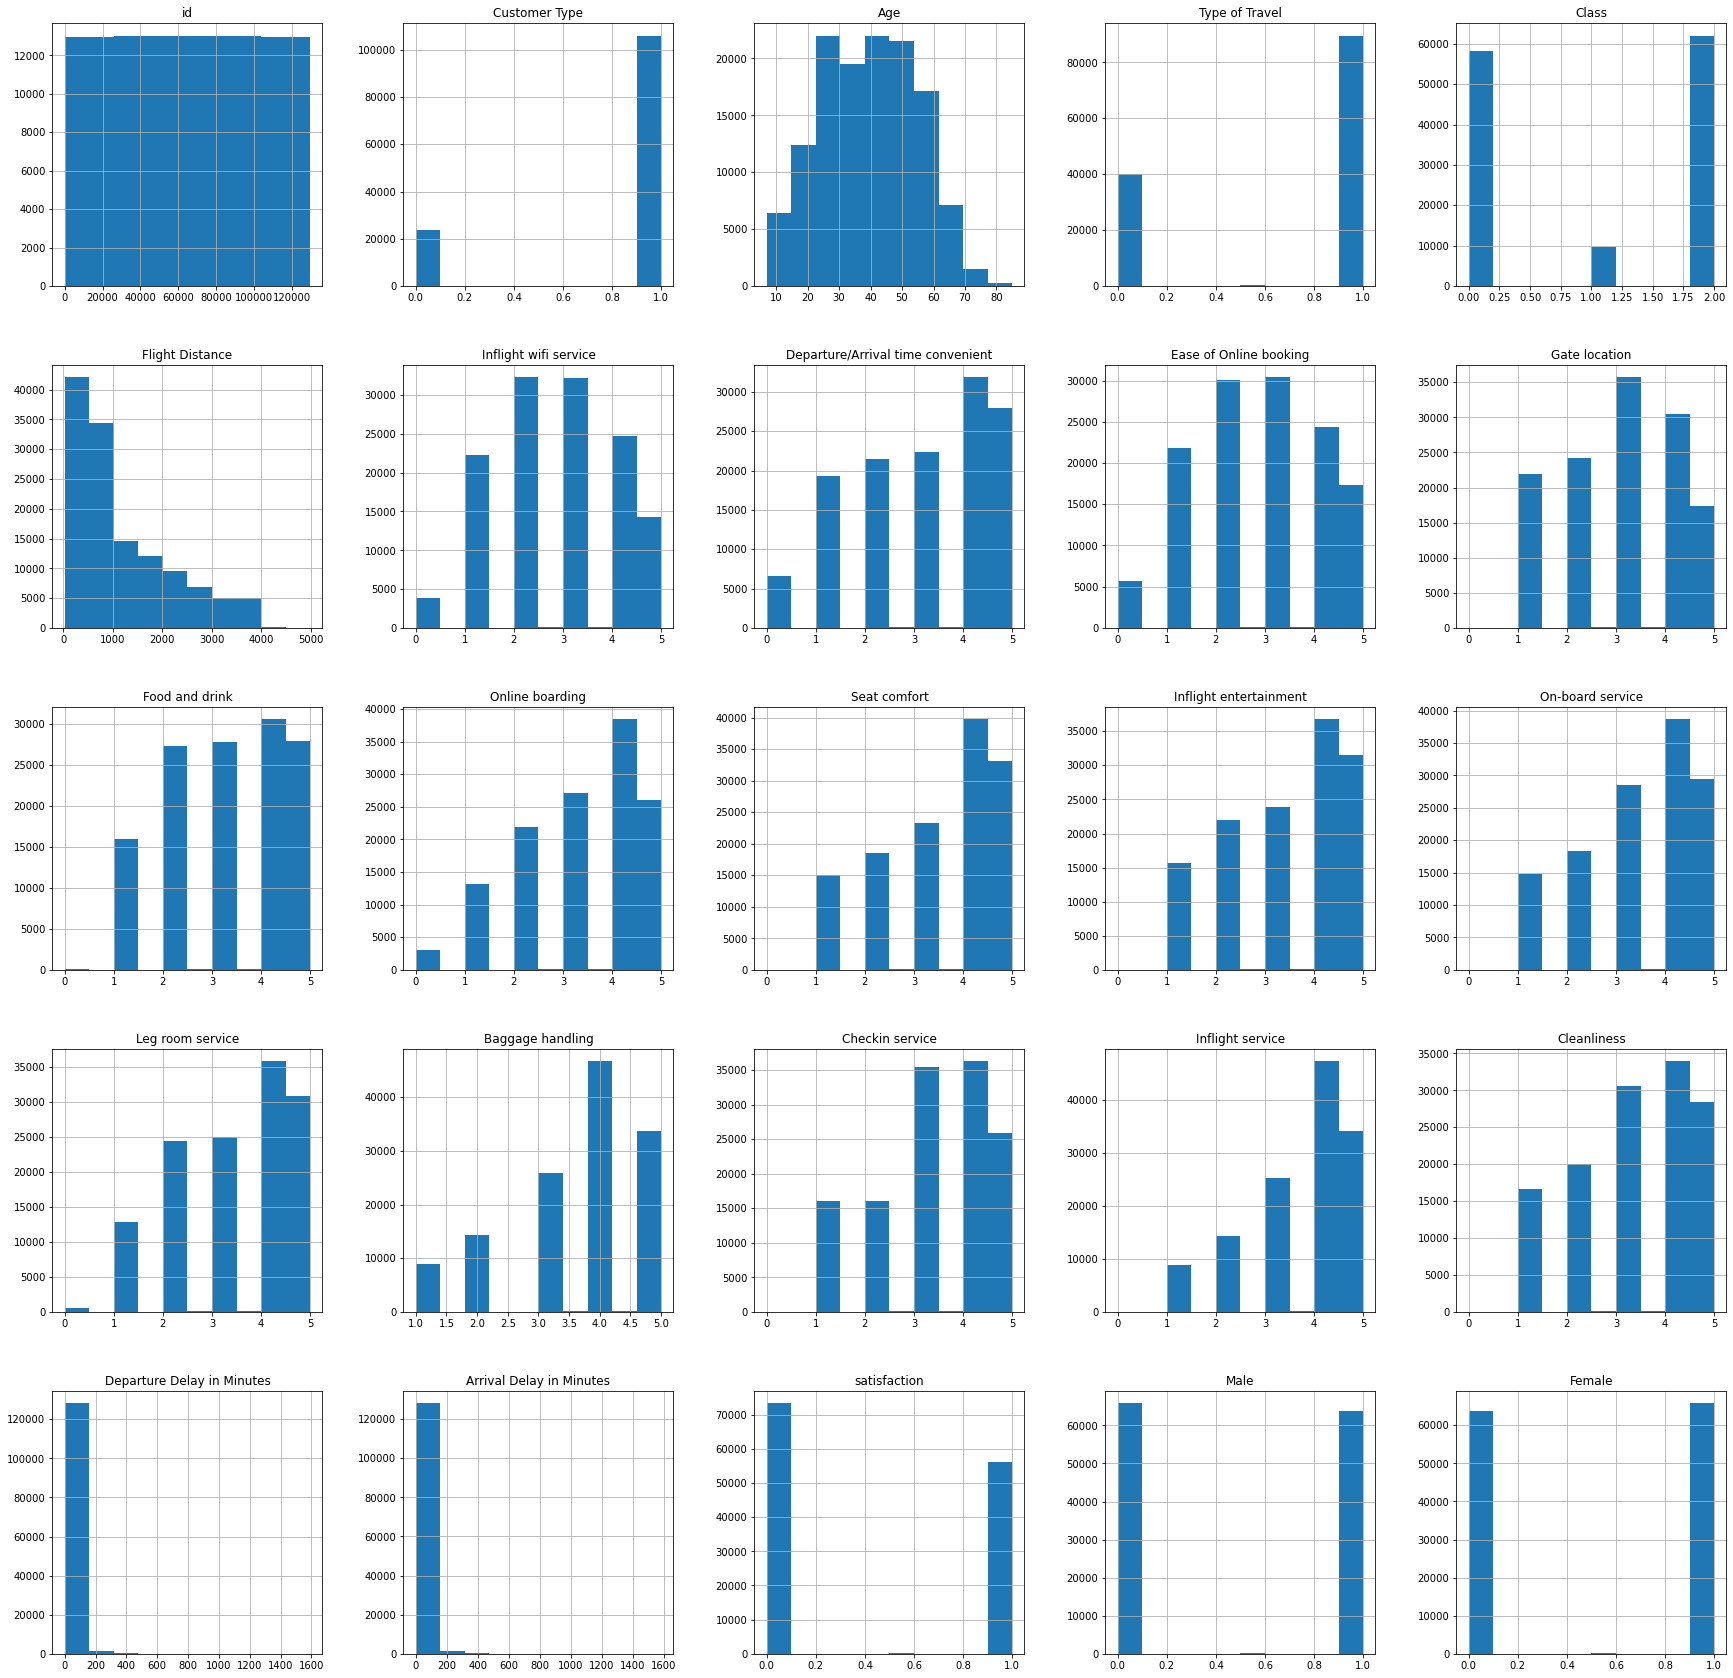

In [85]:
data_interpolated.hist(figsize=(30, 30))

## Data distribution

In [86]:
data = data_interpolated

In [87]:
from matplotlib.pyplot import figure
# age = data['Flight Distance']
# plt.hist(np.log(age))
def plotHist(data, title=''):
    plt.hist(data)
    plt.title(title)
    plt.show()
    plt.close()

('Flight Distance', 1.1077870154663216)


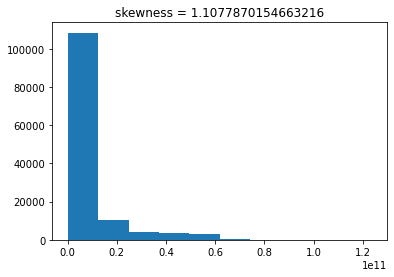

('Departure Delay in Minutes', 6.828459030836458)


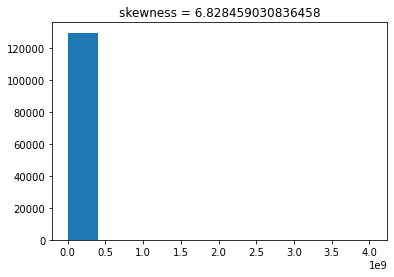

('Arrival Delay in Minutes', 6.683078893326015)


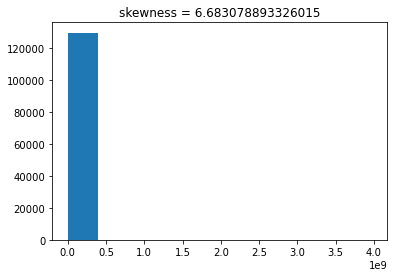

In [88]:
# Histograms of transformed columns with skewed distribution
comlsNotToPlot = ['id', 'Type of Travel', 'satisfaction', 'Male', 'Female', 'Customer Type', 'ind']
df = data.drop(comlsNotToPlot, 1)
for x in zip(df.columns, df.skew(axis=0)):
    if x[1] > 1: # positive/right skewd
        print(x)
        plotHist((data[x[0]]*data[x[0]]*data[x[0]]), 'skewness = '+str(x[1]))
    elif x[1] < -1: # negative/left skewd
        print(x)
        plotHist(np.log(data[x[0]]), x[1])

In [89]:
from matplotlib.pyplot import figure
# age = data['Flight Distance']
# plt.hist(np.log(age))
def plotBox(data, title=''):
    plt.boxplot(data)
    plt.title(title)
    plt.show()
    plt.close()

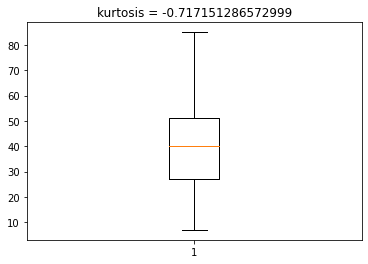

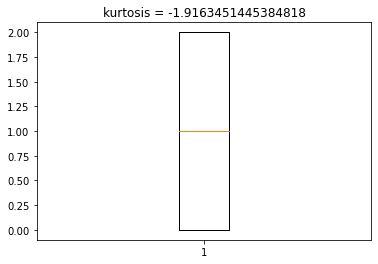

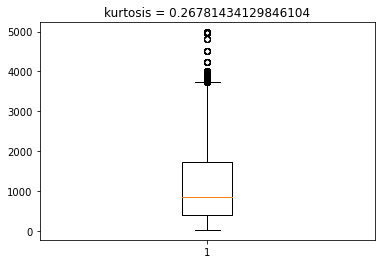

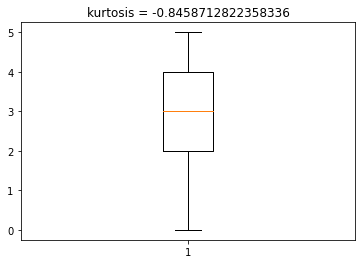

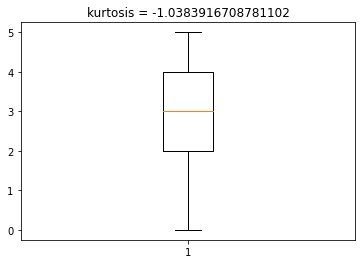

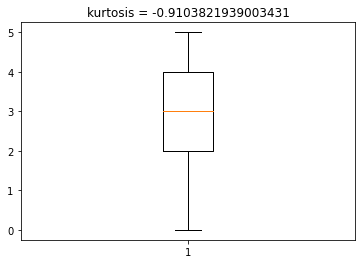

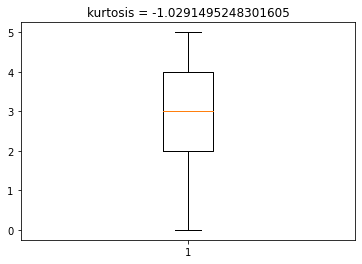

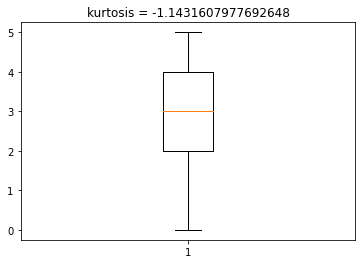

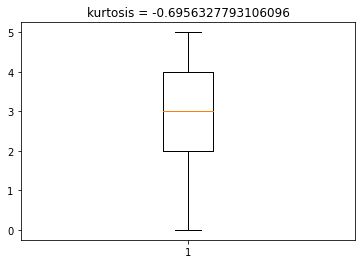

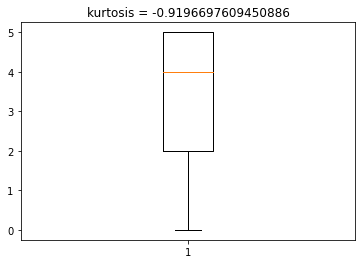

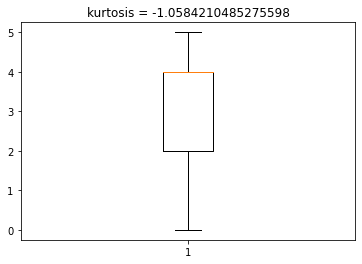

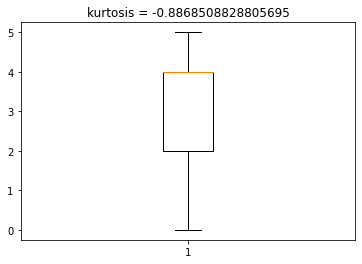

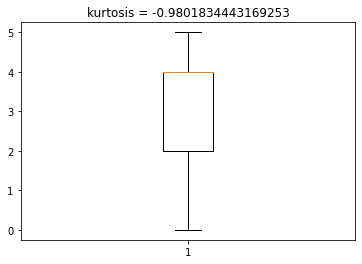

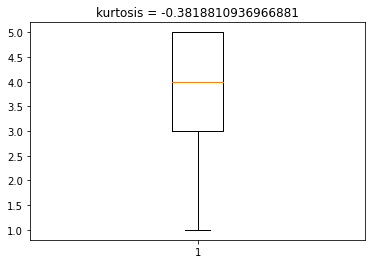

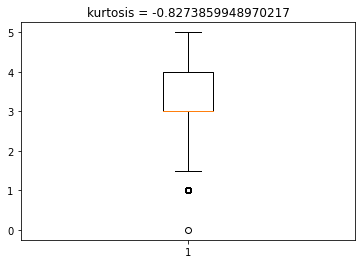

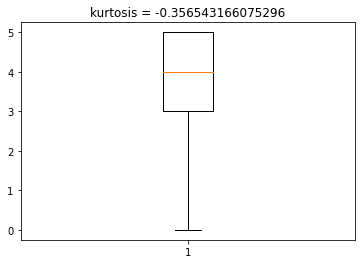

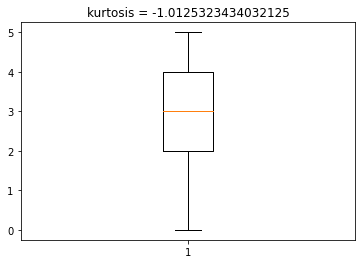

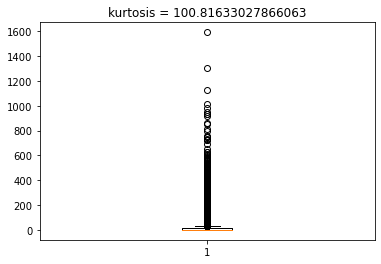

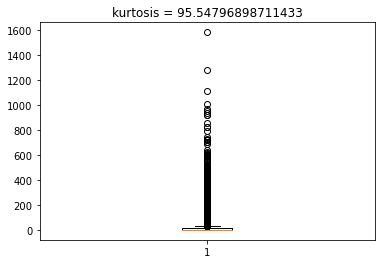

In [90]:
# Boxplots
for x in zip(df.columns, df.kurt(axis=0)):
    plotBox((data[x[0]]), 'kurtosis = '+str(x[1]))

In [95]:
# number of elements with outliers
df.count(axis=0)[0]

129880

In [94]:
# Removing outliers using z-score
from scipy.stats import zscore
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df.count(axis=0)[0]

126693

In [96]:
#number of removed records with outliers
df.count(axis=0)[0] - new_df.count(axis=0)[0]

3187

<AxesSubplot:>

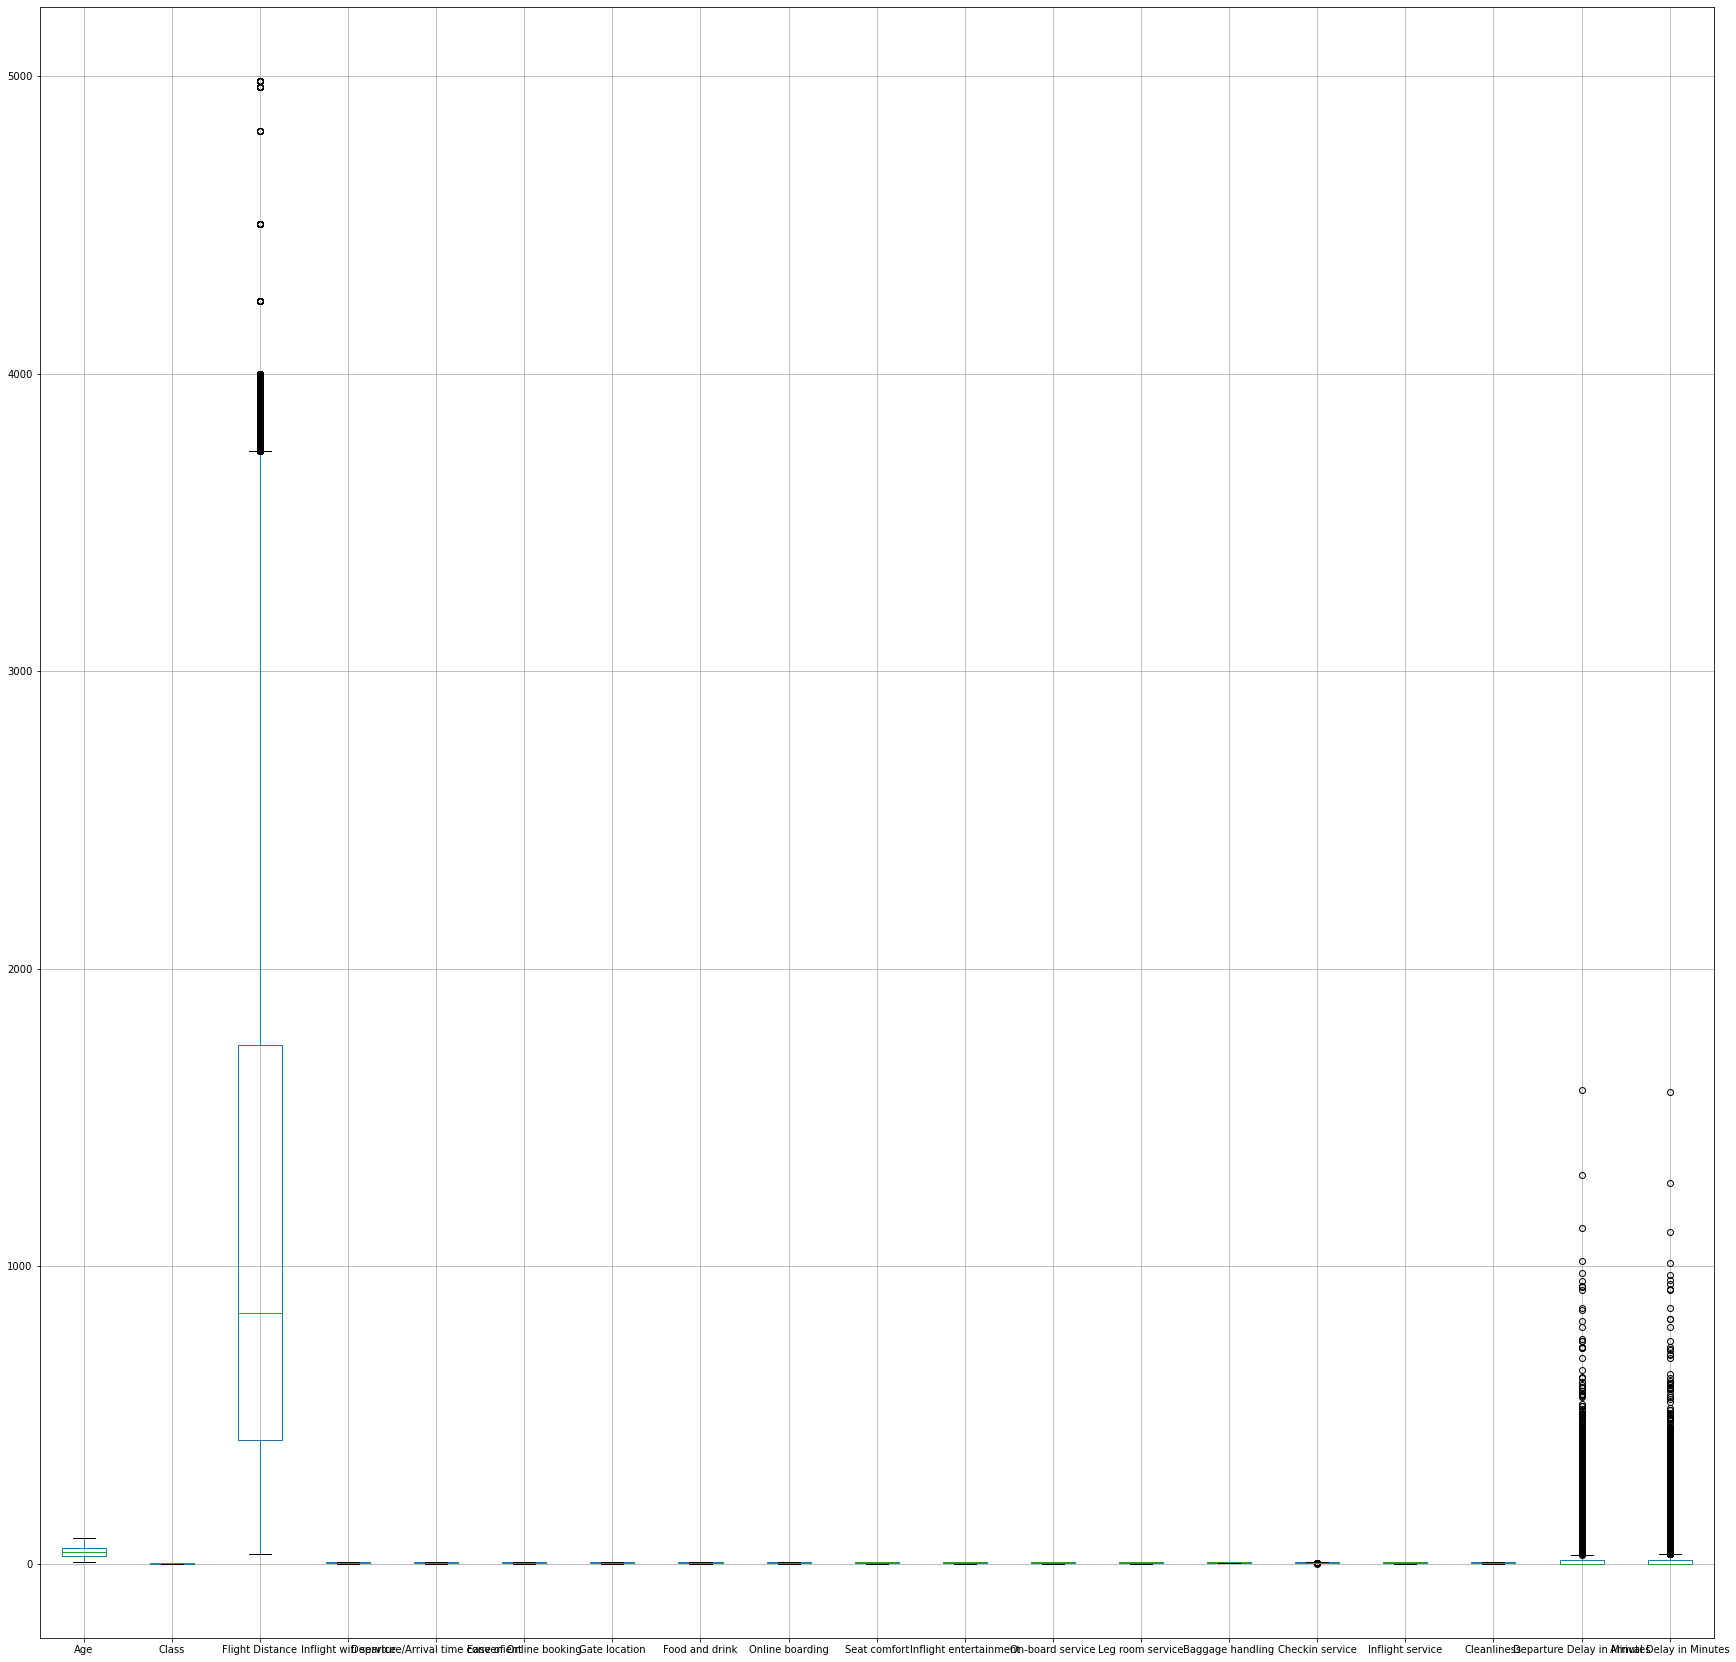

In [97]:
df.boxplot(figsize=(30,30))

### Data Visualization

In [15]:
def plotScatter(x, y, target, title=''):
    figure(figsize=(10, 10))
    plt.scatter(x, y, title, c = target)

In [ ]:
df = data.drop('id', 1)
for colm in df:
    for colm2 in df:
        if colm != colm2: data.plot.scatter(colm, colm2, data['satisfaction'])

In [ ]:
df = data.drop('id', 1)
for colm in df:
    for colm2 in df:
        if colm != colm2: data.plot.scatter(colm, colm2, data['Age'])

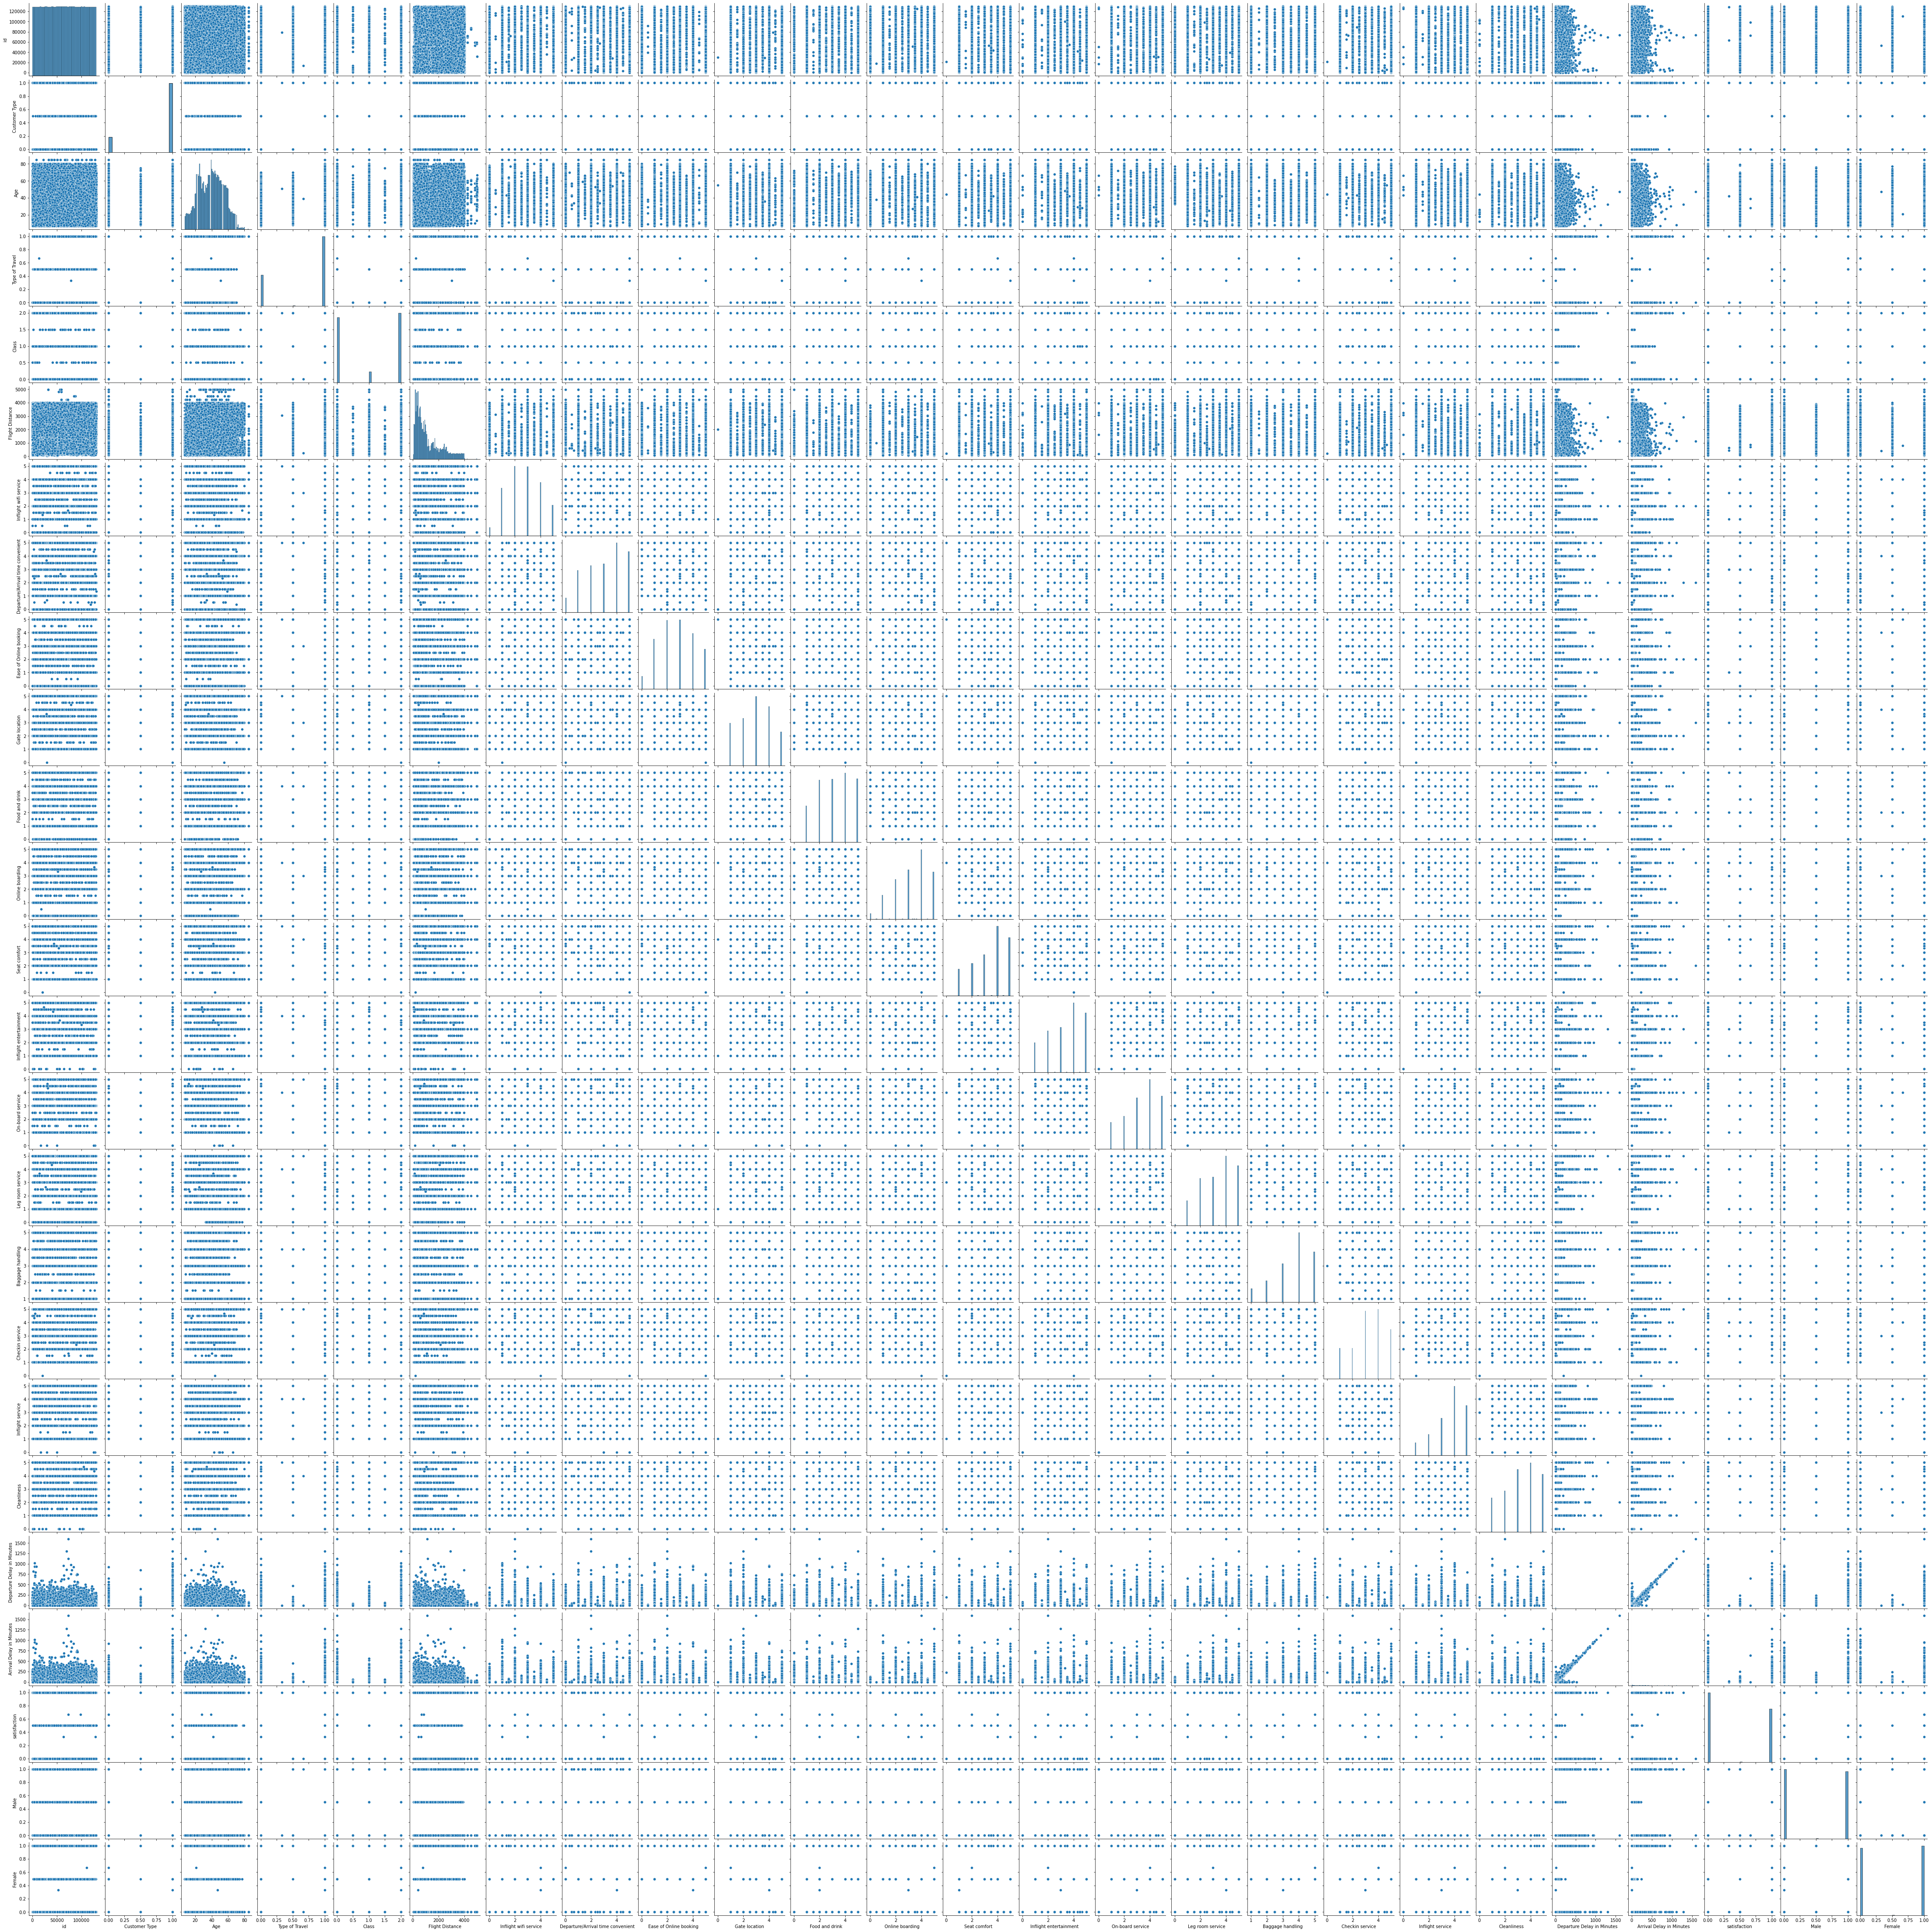

In [24]:
import seaborn as sns
sns.pairplot(data)

# Airline Passenger Satisfaction - Scalling

To-do list:
- skalowanie danych (min-max + std scaler) - ręcznie ze wzoru
- porównanie kilku histogramów przed oraz po sklowaniu obiema metodami, komentarz w notebooku
- komentarz do poedjemowanych działań
- napisać dokładnie co będzie przedmiotem predykcji

### Imports

In [98]:
import pandas as pd
import numpy as np

### Min-max scaller

In [99]:
def min_max_scaller(data):
    new_data = data.to_numpy()
    mini = np.amin(new_data, axis=0)
    new_min = np.amin(new_data, axis=0)
    maxi = np.amax(new_data, axis=0)
    new_max = np.amax(new_data, axis=0)
    result_data = []

    for ind, row in enumerate(new_data):
        result_data.append((row - mini)/(maxi - mini) * (new_max - new_min) + new_min)
        new_data = np.delete(new_data, (0), axis=0)
        if np.shape(new_data)[0] != 0:
            new_min = np.amin(new_data, axis=0)
            new_max = np.amax(new_data, axis=0)

    return result_data

### Std scaller

In [100]:
def std_scaller(data):
    mean = data.mean()
    std = data.std()

    return (data - mean)/std

In [101]:
# temporary drop of column
tmp_df = data_interpolated['ind'].copy()
data_interpolated = data_interpolated.drop(['ind'], axis=1)

minMaxData = pd.DataFrame(min_max_scaller(data_interpolated), columns=data_interpolated.columns.to_list())
stdData = std_scaller(data_interpolated)

In [117]:
#return column
data_interpolated['ind'] = tmp_df.copy()
# minMaxData['inde'] = tmp_df.copy() # Nadal wywala exception
# stdData['ind'] = tmp_df.copy()

In [118]:
data_interpolated.head()

id  Customer Type   Age  Type of Travel  Class  Flight Distance  \
0  19556.0            1.0  52.0             1.0    0.0            160.0   
1  90035.0            1.0  36.0             1.0    2.0           2863.0   
2  12360.0            0.0  20.0             1.0    0.0            192.0   
3  77959.0            1.0  44.0             1.0    2.0           3377.0   
4  36875.0            1.0  49.0             1.0    0.0           1182.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                    5.0                                4.0   
1                    1.0                                1.0   
2                    2.0                                0.0   
3                    0.0                                0.0   
4                    2.0                                3.0   

   Ease of Online booking  Gate location  ...  Baggage handling  \
0                     3.0            4.0  ...               5.0   
1                     3.0            1.0  ...               4.0   
2                     2.0            4.0  ...               3.0   
3                     0.0            2.0  ...               1.0   
4                     4.0            3.0  ...               2.0   

   Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  \
0              2.0               5.0          5.0                        50.0   
1              3.0               4.0          5.0                         0.0   
2              2.0               2.0          2.0                         0.0   
3              3.0               1.0          4.0                         0.0   
4              4.0               2.0          4.0                         0.0   

   Arrival Delay in Minutes  satisfaction  Male  Female   ind  
0                      44.0           1.0   0.0     1.0  test  
1                       0.0           1.0   0.0     1.0  test  
2                       0.0           0.0   1.0     0.0  test  
3                       6.0           1.0   1.0     0.0  test  
4                      20.0           1.0   0.0     1.0  test  

[5 rows x 26 columns]

In [119]:
minMaxData.head()

id  Customer Type   Age  Type of Travel  Class  Flight Distance  \
0  19556.0            1.0  52.0             1.0    0.0            160.0   
1  90035.0            1.0  36.0             1.0    2.0           2863.0   
2  12360.0            0.0  20.0             1.0    0.0            192.0   
3  77959.0            1.0  44.0             1.0    2.0           3377.0   
4  36875.0            1.0  49.0             1.0    0.0           1182.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                    5.0                                4.0   
1                    1.0                                1.0   
2                    2.0                                0.0   
3                    0.0                                0.0   
4                    2.0                                3.0   

   Ease of Online booking  Gate location  ...  Leg room service  \
0                     3.0            4.0  ...               5.0   
1                     3.0            1.0  ...               4.0   
2                     2.0            4.0  ...               1.0   
3                     0.0            2.0  ...               1.0   
4                     4.0            3.0  ...               2.0   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0               5.0              2.0               5.0          5.0   
1               4.0              3.0               4.0          5.0   
2               3.0              2.0               2.0          2.0   
3               1.0              3.0               1.0          4.0   
4               2.0              4.0               2.0          4.0   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  Male  \
0                        50.0                      44.0           1.0   0.0   
1                         0.0                       0.0           1.0   0.0   
2                         0.0                       0.0           0.0   1.0   
3                         0.0                       6.0           1.0   1.0   
4                         0.0                      20.0           1.0   0.0   

   Female  
0     1.0  
1     1.0  
2     0.0  
3     0.0  
4     1.0  

[5 rows x 25 columns]

In [120]:
stdData.head()

id  Customer Type       Age  Type of Travel     Class  \
0 -1.211664       0.473999  0.832006        0.670021 -1.070793   
1  0.670064       0.473999 -0.227096        0.670021  1.008749   
2 -1.403791      -2.113879 -1.286198        0.670021 -1.070793   
3  0.347645       0.473999  0.302455        0.670021  1.008749   
4 -0.749262       0.473999  0.633425        0.670021 -1.070793   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0        -1.034092               1.709987                           0.617757   
1         1.678806              -1.301706                          -1.348906   
2        -1.001975              -0.548782                          -2.004461   
3         2.194689              -2.054629                          -2.004461   
4        -0.008350              -0.548782                          -0.037797   

   Ease of Online booking  Gate location  ...  Leg room service  \
0                0.173616       0.801248  ...          1.254109   
1                0.173616      -1.547626  ...          0.493608   
2               -0.540532       0.801248  ...         -1.787894   
3               -1.968829      -0.764668  ...         -1.787894   
4                0.887764       0.018290  ...         -1.027393   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0          1.160565        -1.032790          1.155357     1.305649   
1          0.312376        -0.242150          0.304648     1.305649   
2         -0.535813        -1.032790         -1.396769    -0.980186   
3         -2.232191        -0.242150         -2.247478     0.543704   
4         -1.384002         0.548489         -1.396769     0.543704   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                    0.927428                  0.753056      1.142304   
1                   -0.386480                 -0.392970      1.142304   
2                   -0.386480                 -0.392970     -0.877098   
3                   -0.386480                 -0.236694      1.142304   
4                   -0.386480                  0.127951      1.142304   

       Male    Female  
0 -0.985994  0.986149  
1 -0.985994  0.986149  
2  1.016099 -1.016149  
3  1.016099 -1.016149  
4 -0.985994  0.986149  

[5 rows x 25 columns]

C:\Users\dt\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


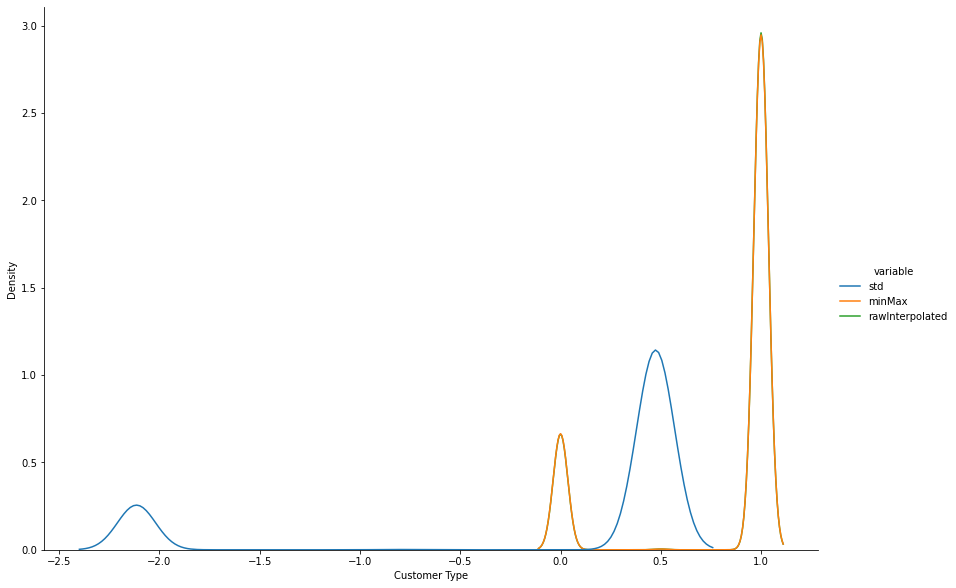

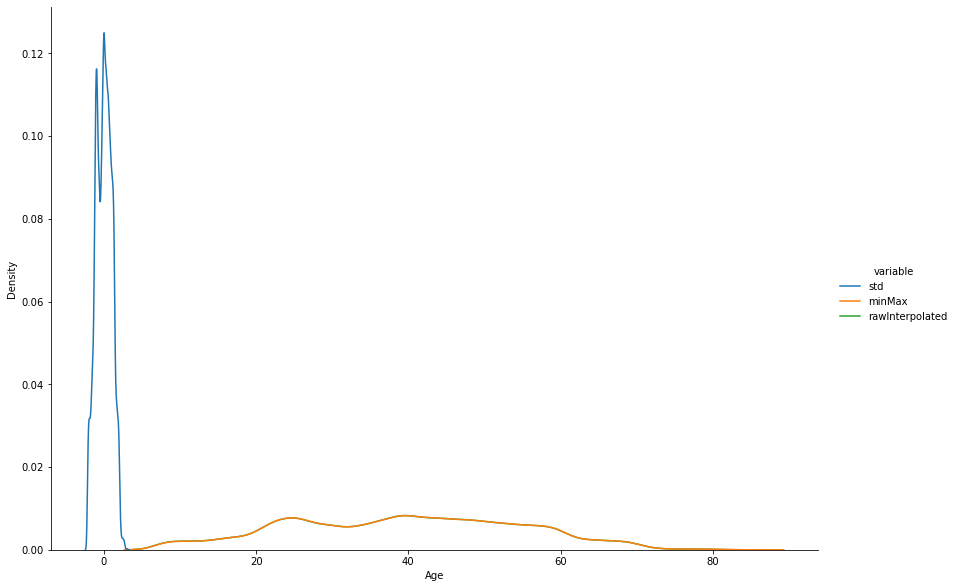

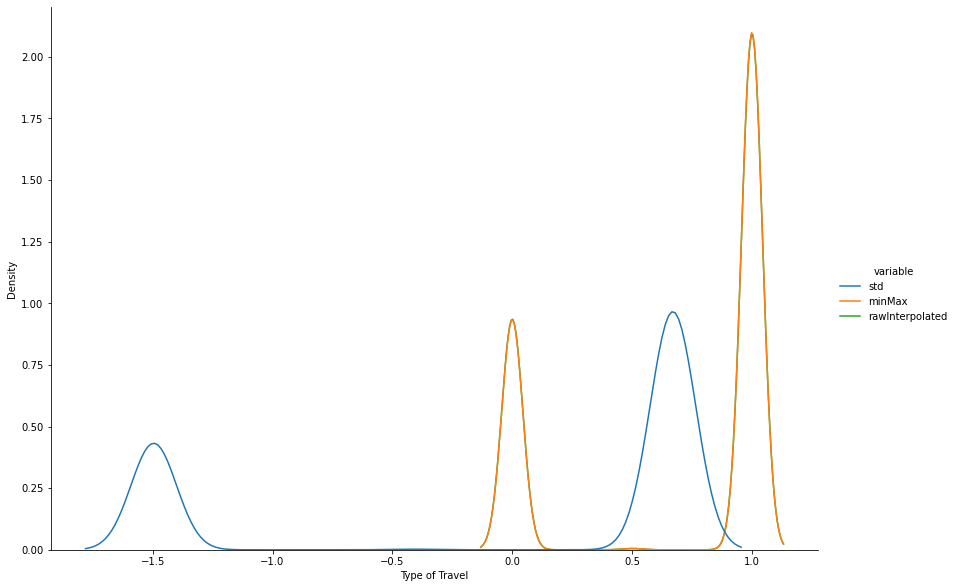

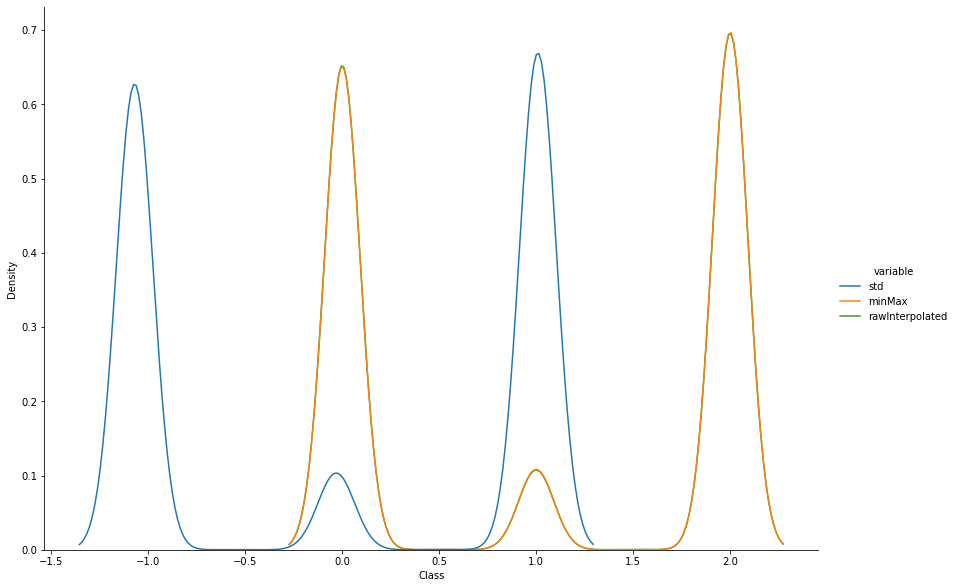

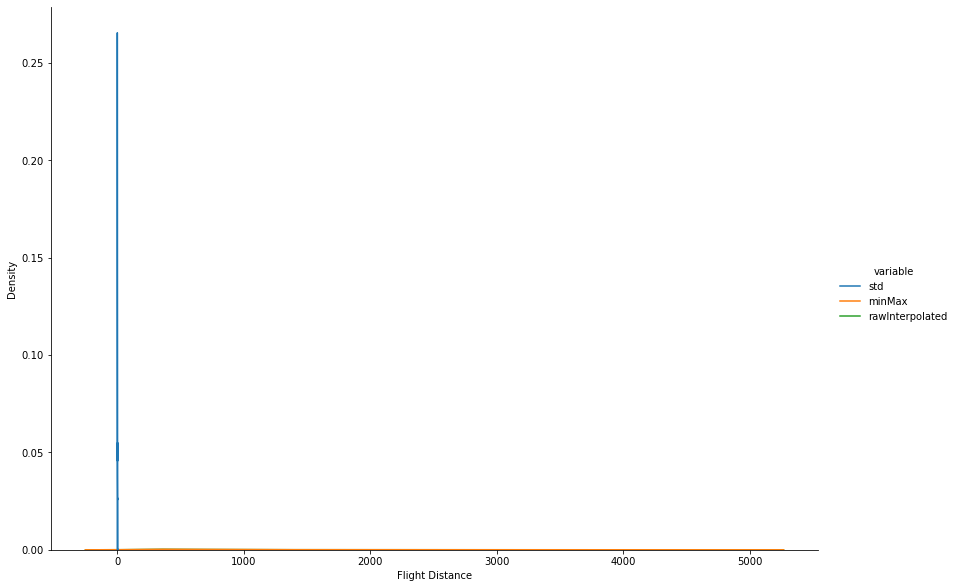

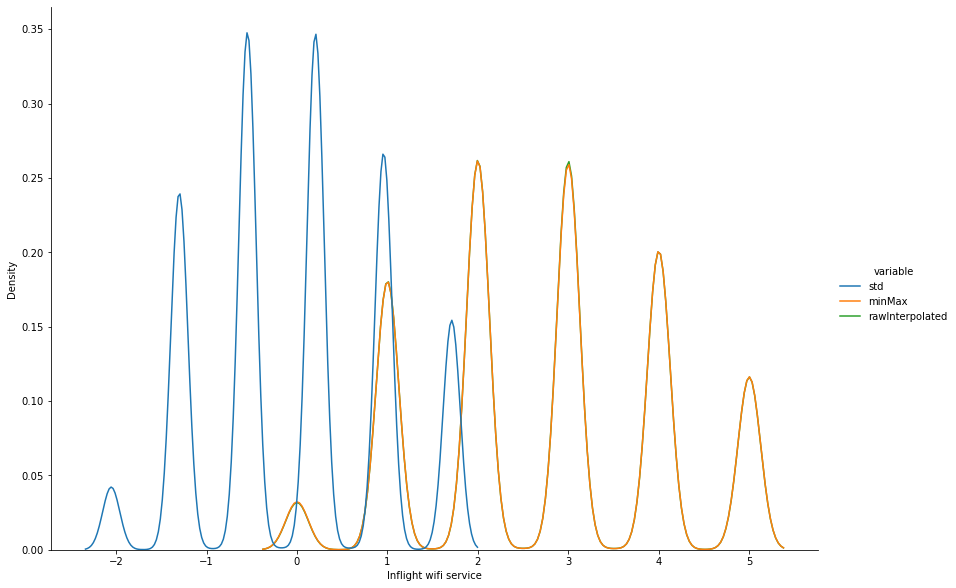

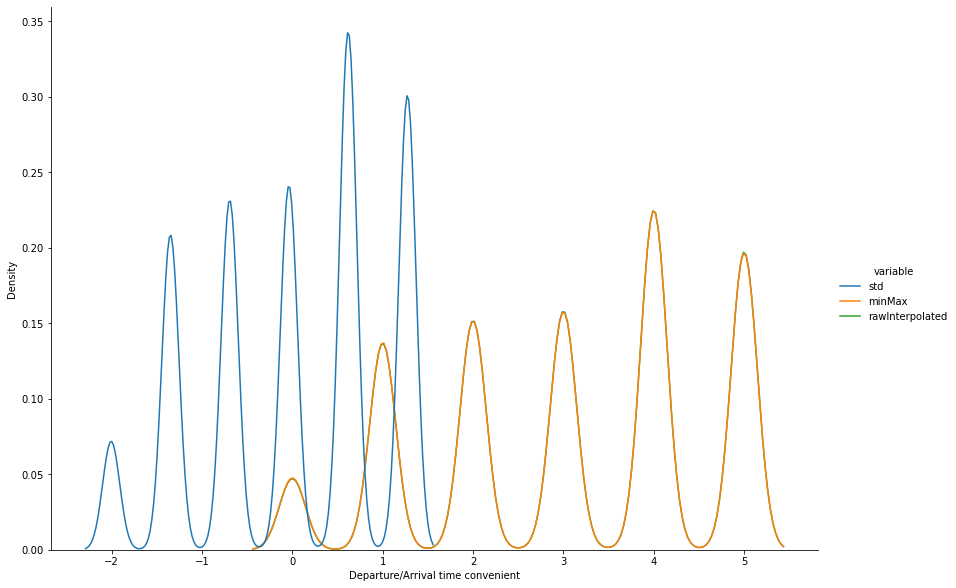

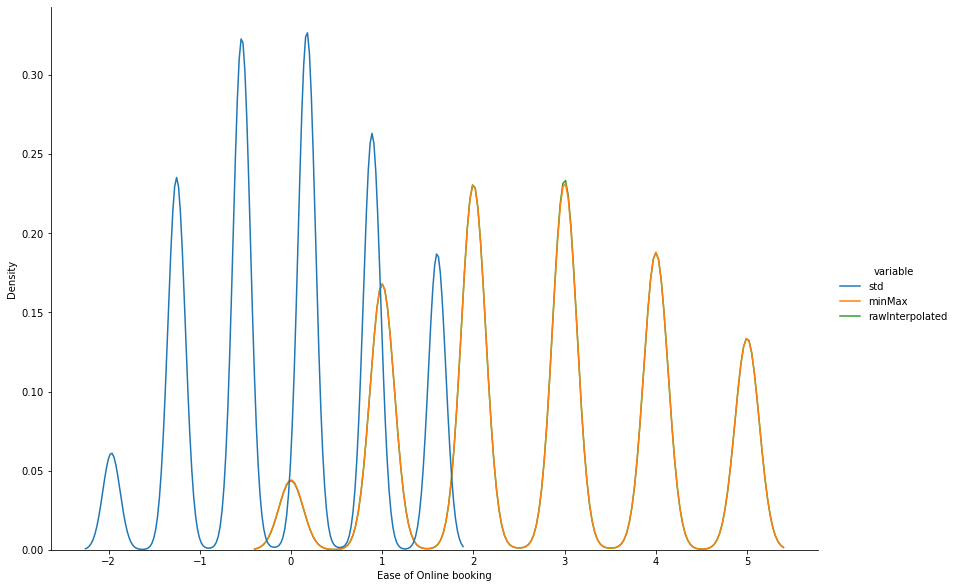

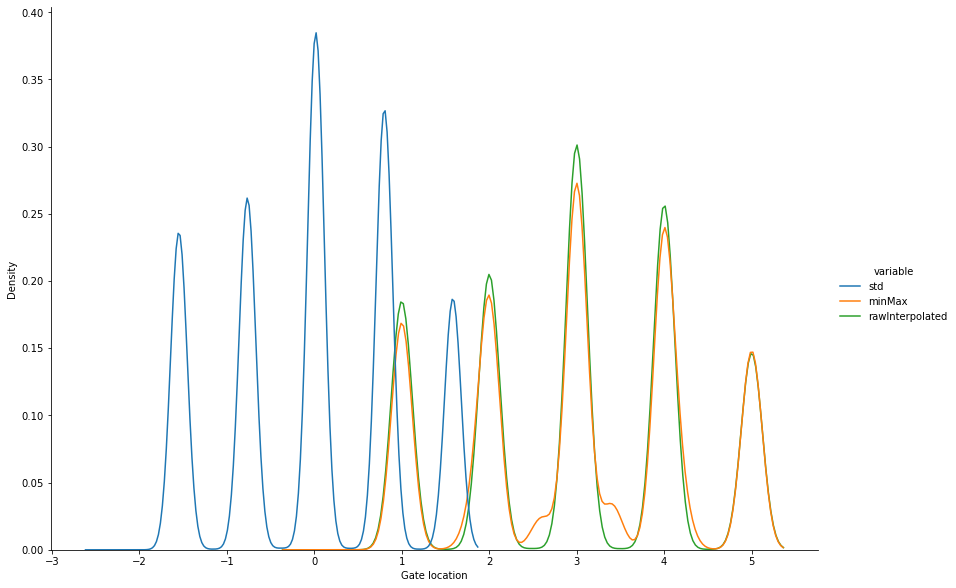

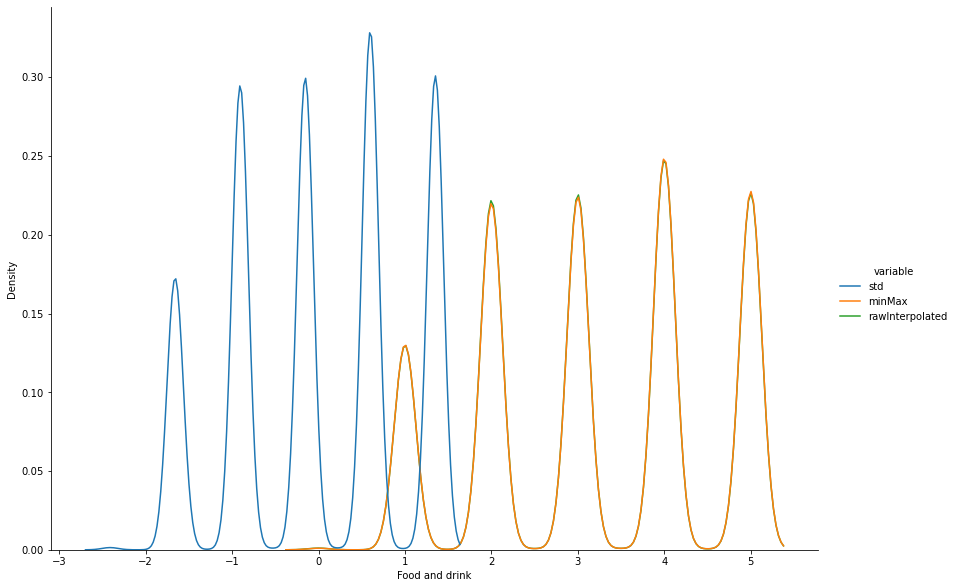

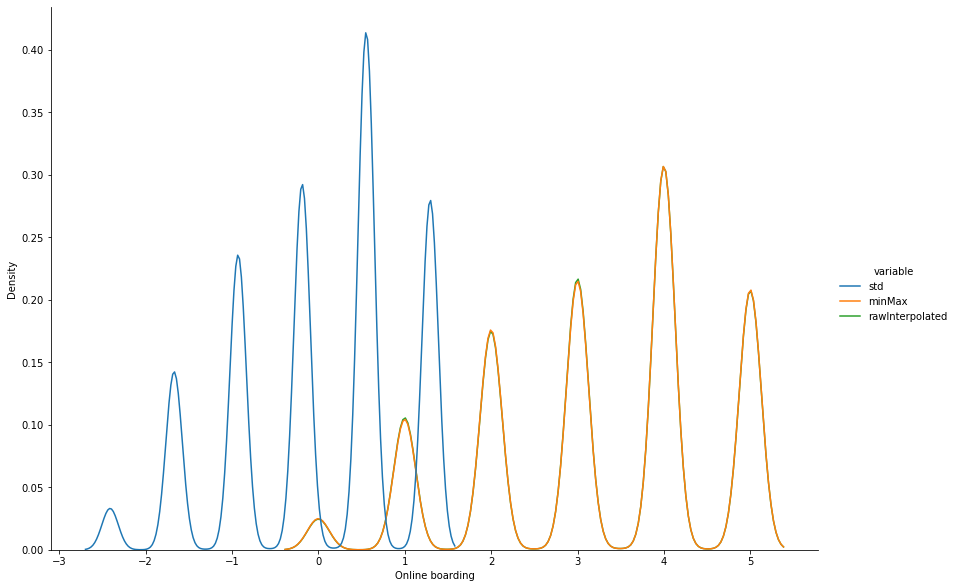

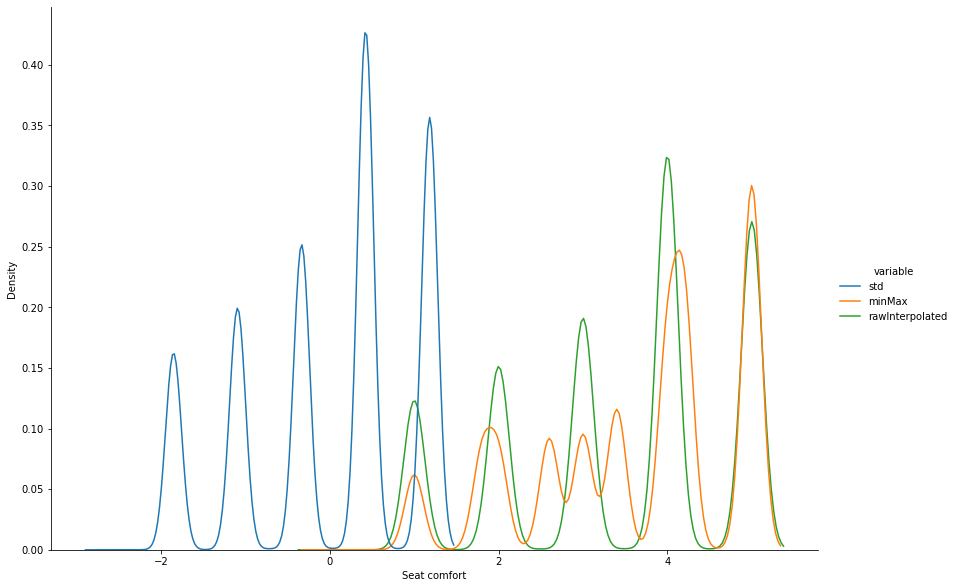

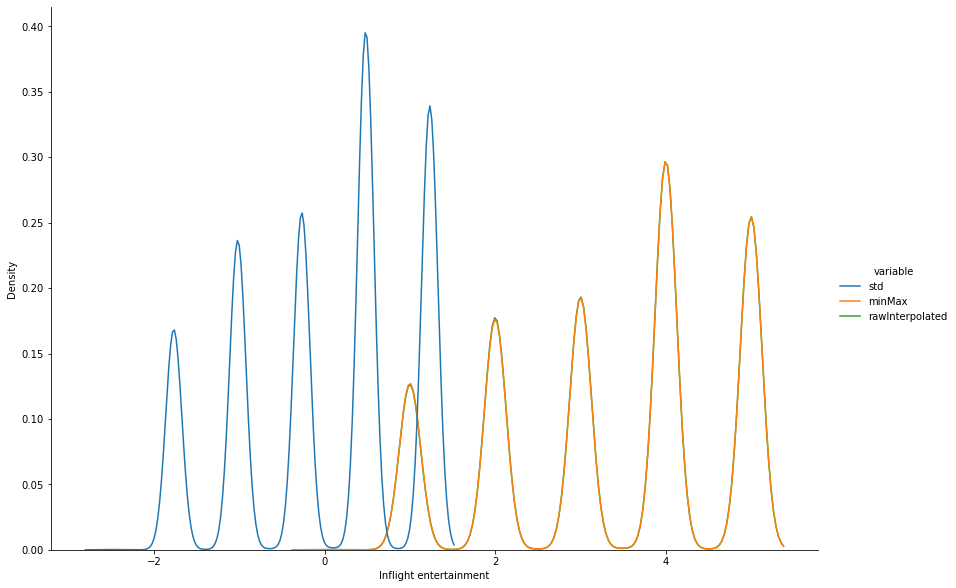

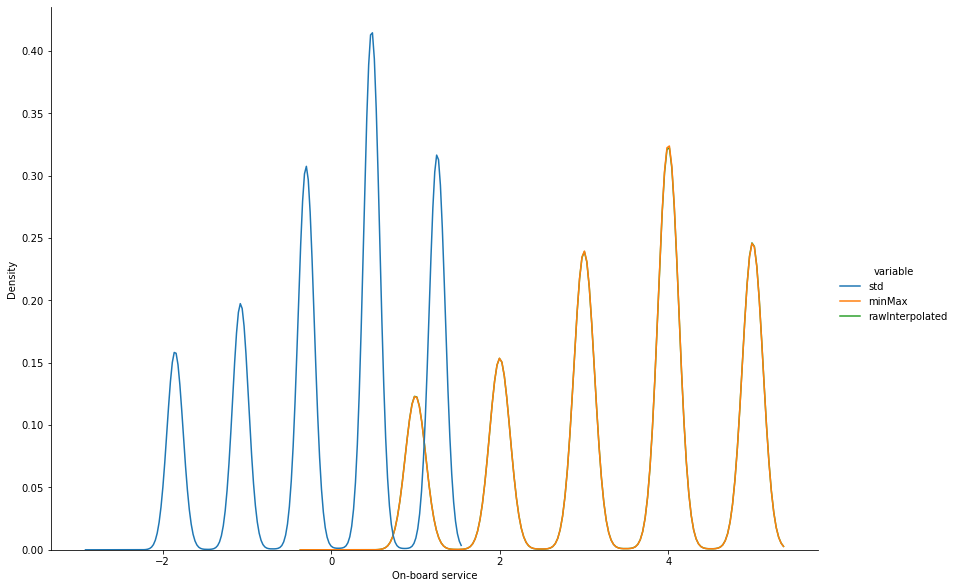

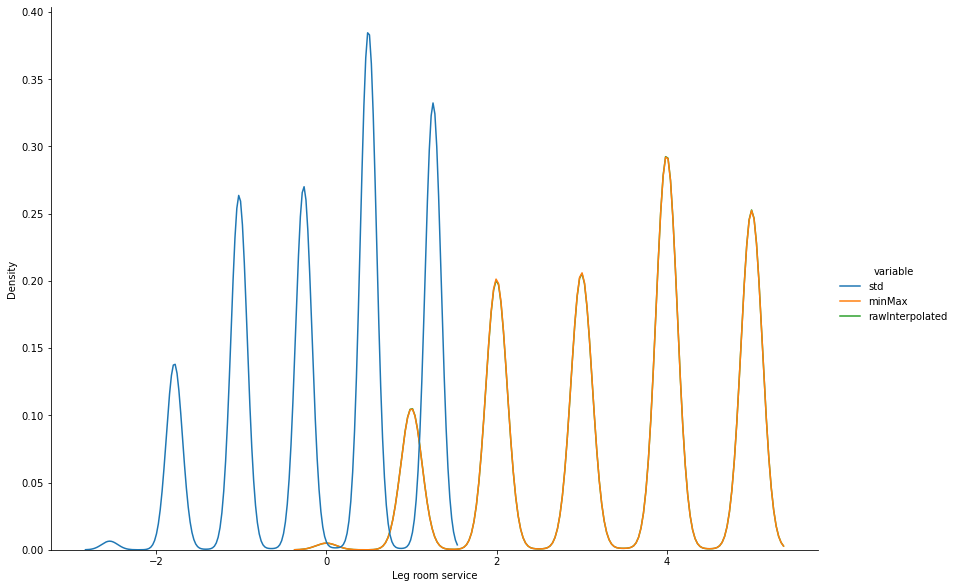

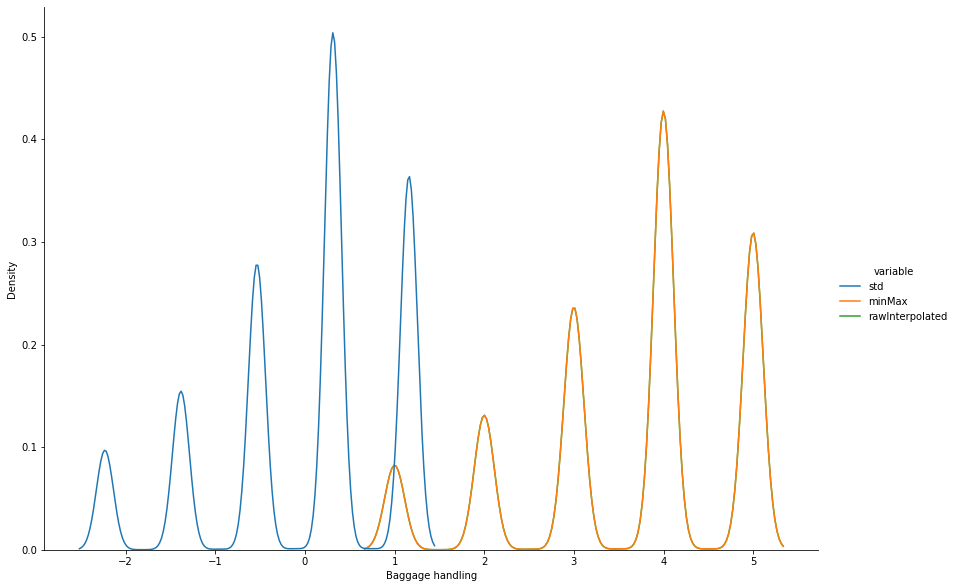

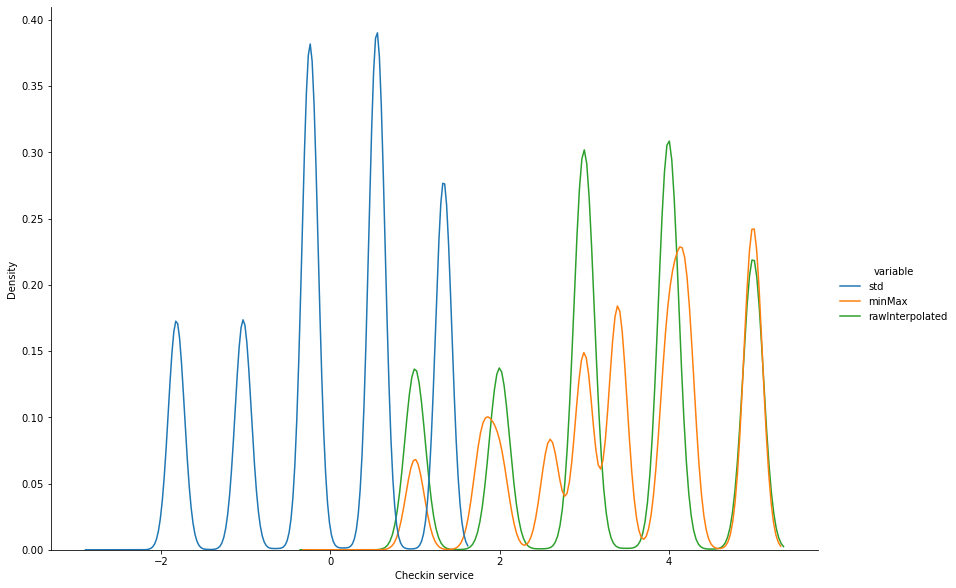

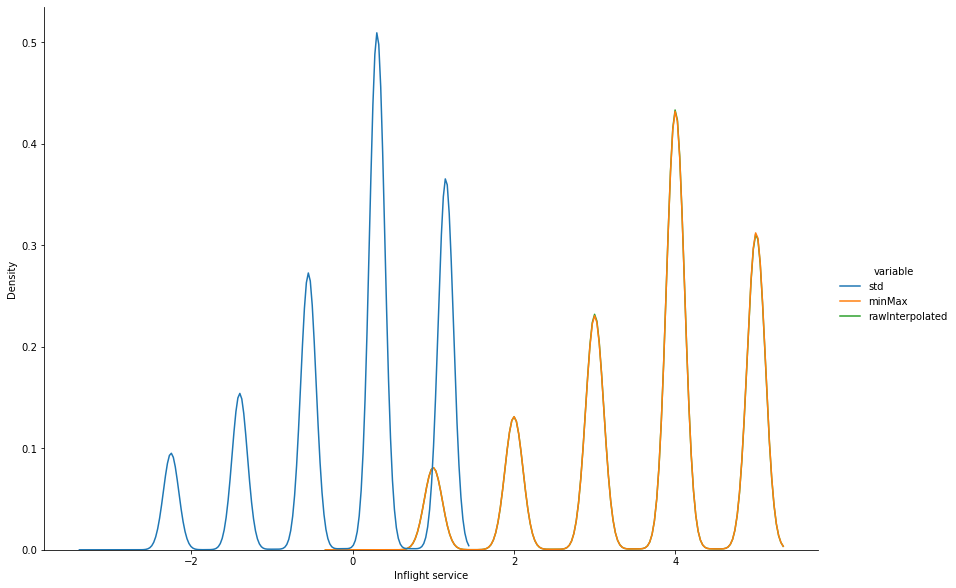

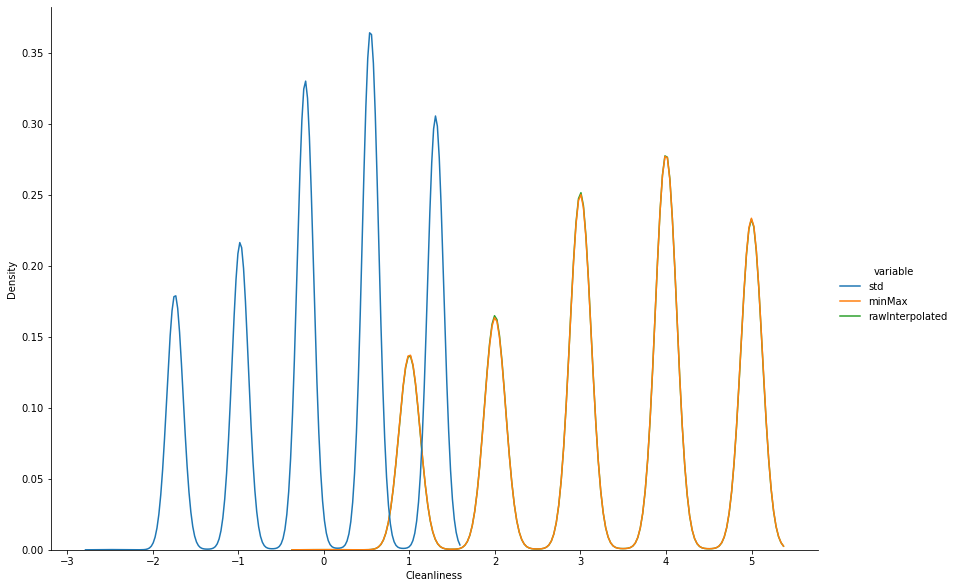

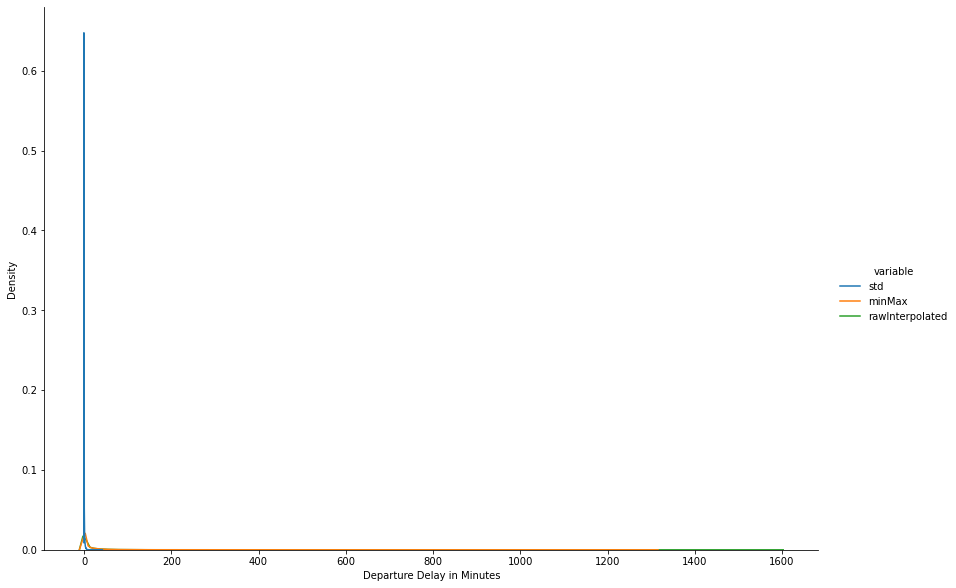

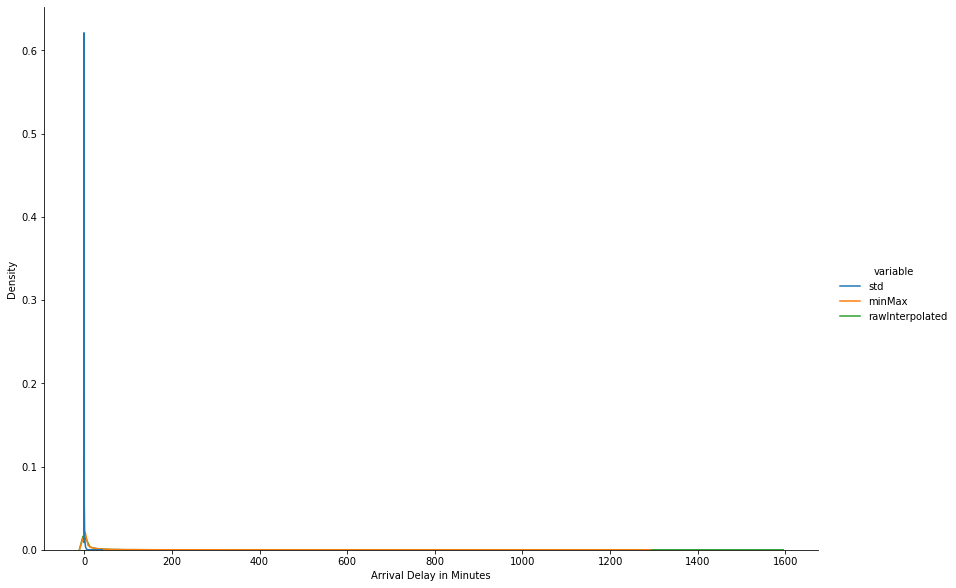

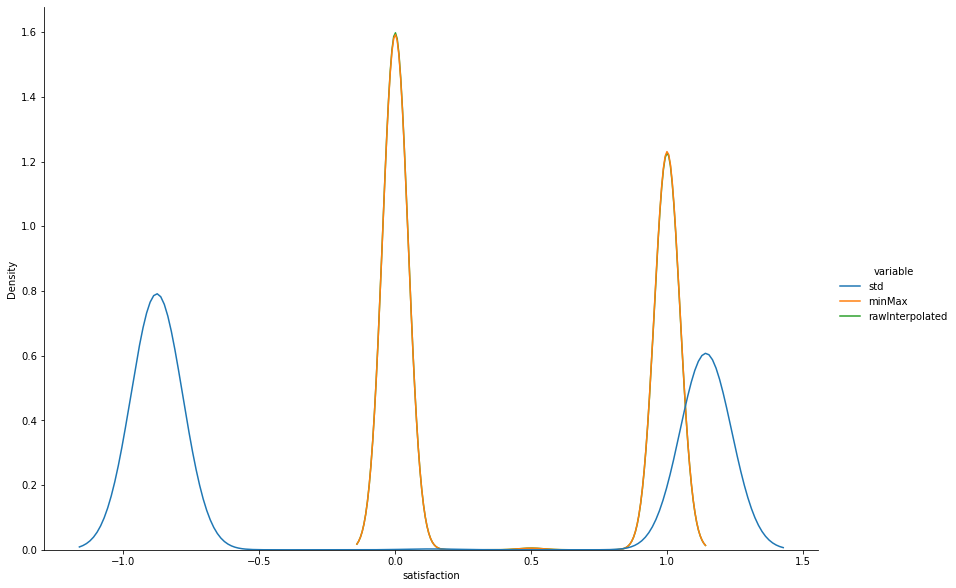

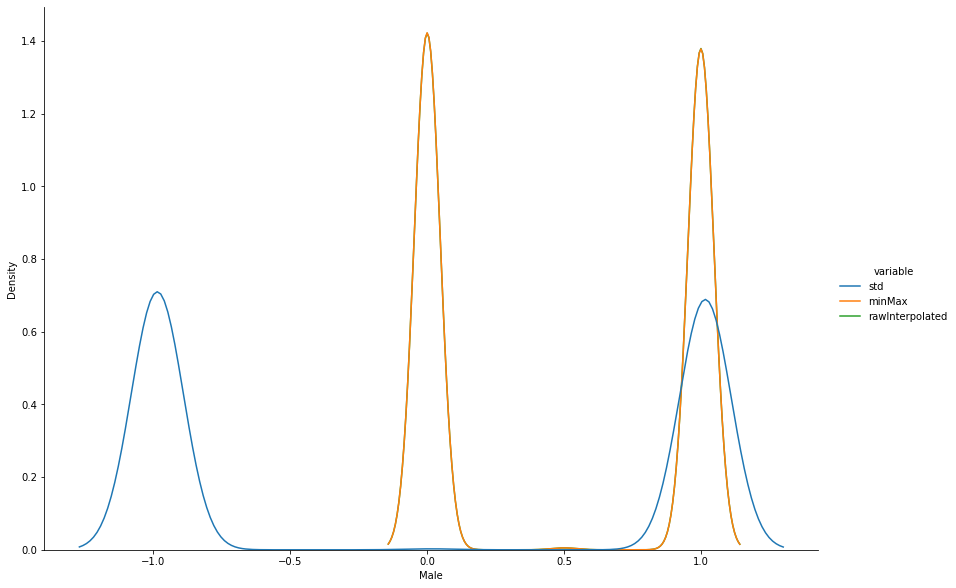

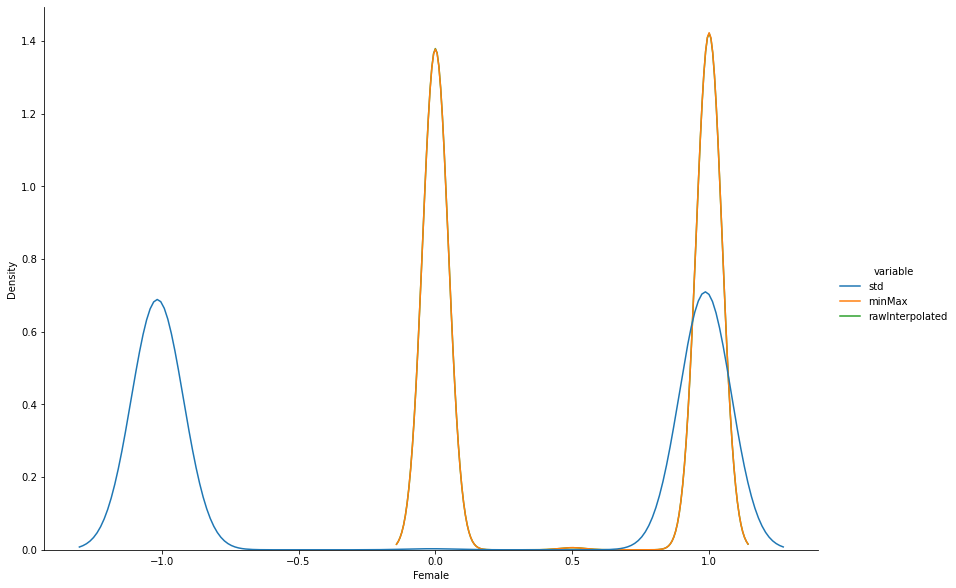

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
# displots raw, minMax, std
# a4_dims = (20, 8)
# fig, ax = plt.subplots(figsize=a4_dims)

for feature in data.columns[1:-1]:
    df = pd.DataFrame()
    df['std'] = stdData[feature]
    df['minMax'] = minMaxData[feature]
    df['rawInterpolated'] = data_interpolated[feature]
    dfm = df.melt(value_vars=['std','minMax','rawInterpolated'], value_name=feature)
    sns.displot(data=dfm, x=feature, hue="variable", kind="kde", height=8.27, aspect=11.7/8.27)
    
    
#     sns.distplot(ax=ax, x=dfm[feature], rug=True, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
    

Wykresy przestawiające rozkłady danych cech w sposób ciągły w zależności od typu standaryzacji nie zmieniły swoich kształtów, lecz zmienił się ich zakres. Jak da się zauważyć np. na wykresie dotyczącym kolumny "Checkin service" reprezentującej wartość oceny jakości obsługi w skali 0-5, standaryzacja min-max wpłyneła głównie na gęstość, delikatnie zmieniając zakres danych (przesuwając je nieco bliżej zera). Natomiast jeśli chodzi o standaryzację standadową, ta nieco nawet rozciągnęła dane wzdłuż osi pionowej i wyraźnie przeskalowała zakres, tak iż wartości rozkładają się mniej więcej po równo wokół zera. Pozostałe wykresy dostarczają podobnych obserwacji, zatem standa 

### Results

Wybrany zbiór został wstępnie przetworzony w celu lepszego przystosowania do nauki mododelu ML, ktoki jakie zostały wykonane:
1. Uzupełnienie wartości brakujących
2. Usunięcie wartości odstających
3. Ręczna standaryzacja
4. Wizualizacja danych

# Sklearn scaling 

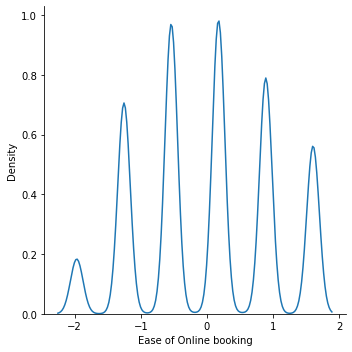

In [143]:
df_std = data.copy()
df_std.drop(['ind'], axis=1, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_std)
df_std = scaler.transform(df_std)

df_std = pd.DataFrame(df_std, columns=data.columns[:-1])

sns.displot(data=df_std, x='Ease of Online booking', kind="kde")

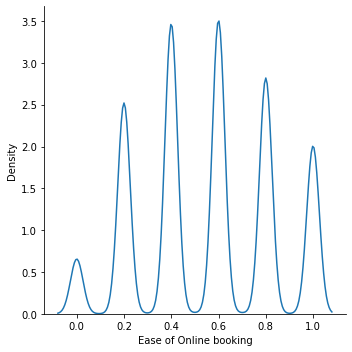

In [144]:
df_mm = data.copy()
df_mm.drop(['ind'], axis=1, inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_mm)
df_mm = scaler.transform(df_mm)

df_mm = pd.DataFrame(df_mm, columns=data.columns[:-1])

sns.displot(data=df_mm, x='Ease of Online booking', kind="kde")

In [ ]:
# splitting data back to test and train dataset
test, train = data[data["ind"].eq("test")], data[data["ind"].eq("train")]